In [137]:
#generate_traj(200)

In [5]:
from Tools import generate_traj,random_rot,traj_to_dist
from scitool.propertie import Propertie

ndim = 2

def add_miss_tracking(traj,N,f=10):
    
    step = traj[1:]-traj[:-1]
    
    std = np.average(np.sum(step**2,axis=1)**0.5)
    
    for i in range(N):
        w = np.random.randint(0,len(traj))
        traj[w] = np.random.normal(traj[w],f*std)
    
    return traj


def generate_N_nstep(N,nstep):
    add = 0
    if ndim == 3:
        add = 1
    size = nstep
    
    X_train = np.zeros((N,size,(5+add)))
    Y_trains = np.zeros((N,size,10))
    Y_train_cat = np.zeros((N,1,27))
    Y_train_traj = []

    #12
    for i in range(N):
    #for i in range(1000):

        #if i % 1000 == 0:
        #    print i
        sigma = max(np.random.normal(0.5,1),0.05)
        step = max(np.random.normal(1,1),0.2)
        tryagain = True
        while tryagain:
            try:

         
                clean = 4
                if size >=50:
                    clean = 8
                    
                clean = False
                """
                ModelN,Model_num,s,sc,real_traj,norm,Z = generate_traj(size,sub=True,
                                                                       clean=clean,diff_sigma=2.0,
                                                                       delta_sigma_directed=1.,ndim=ndim,
                                                                      anisentropy=0.1,deltav=0.2,rho_fixed=False)
                """
                clean=10
                
                ModelN,Model_num,s,sc,real_traj,norm,Z = generate_traj(size,sub=False,
                                                                       clean=clean,diff_sigma=2.0,
                                                                       delta_sigma_directed=6.,ndim=ndim,
                                                                      anisentropy=0.1,deltav=.4,rho_fixed=False,
                                                                      random_rotation=False)
                mu=2
                Ra0 = [0,1.]
             
                
                alpharot = 2*3.14*np.random.random()
                
                dt = real_traj[1:]-real_traj[:-1]
                std = np.mean(np.sum(dt**2,axis=1)/3)**0.5
                
                
                noise_level = .25*np.random.rand()
                real_traj += np.random.normal(0,noise_level*std,real_traj.shape)
                
                real_traj  = random_rot(real_traj,alpharot,ndim=ndim)
                

                
                #print real_traj.shape
                alligned_traj,normed,alpha,_ = traj_to_dist(real_traj,ndim=ndim)
                simple=True
                if not simple:
                    real_traj1 = np.array([Propertie(real_traj[::,0]).smooth(2),
                                           Propertie(real_traj[::,1]).smooth(2)])
                    alligned_traj1,normed1,alpha1,_ = traj_to_dist(real_traj1.T,ndim=ndim)
                    real_traj2 = np.array([Propertie(real_traj[::,0]).smooth(5),
                                           Propertie(real_traj[::,1]).smooth(5)])
                    alligned_traj2,normed2,alpha2,_ = traj_to_dist(real_traj2.T,ndim=ndim)

                    normed = np.concatenate((normed[::,:4],normed1[::,:4],normed2),axis=1)

                for zero in Z:
                    normed[zero,::] = 0
            
                tryagain=False
                
                
            except IndexError:
                tryagain=True
                
        Y_train_traj.append(real_traj)
        X_train[i] = normed
      
        Y_trains[i][range(size),np.array(sc,dtype=np.int)] = 1
     
        Y_train_cat[i,0,Model_num] = 1
        
    
    return X_train,Y_trains,Y_train_cat,Y_train_traj

print generate_N_nstep(1000,100)[0].shape

(1000, 100, 5)


In [8]:
from Tools import diffusive,directed,accelerated,heart,sinusoidal,fractionnal_brownian,subdiffusive
from Tools import sub_confined_on_plane,brownian_confined_in_sphere,brownian_confined_on_plane
from Tools import sub_confined_in_sphere, brownian_confined_on_plane_0p7 , sub_confined_on_plane_0p7

ndim = 3

lm = [diffusive,directed,accelerated,heart,sinusoidal,subdiffusive]
lm += [brownian_confined_in_sphere,brownian_confined_on_plane,sub_confined_in_sphere,sub_confined_on_plane]
lm += [ brownian_confined_on_plane_0p7 , sub_confined_on_plane_0p7]
M = ["diff","direct","accel","heart","sinus","sub","b_sphep","B_plane","sub_sphere","sub_plane","Bp07","Sp07"]

def generate_N_nstep_uniform(N,nstep):
    add = 0
    if ndim == 3:
        add = 1
    size = nstep
    
    X_train = np.zeros((N,size,5+add))
    Y_trains = np.zeros((N,size,12))
    Y_train_cat = np.zeros((N,1,27))
    X_traj_test = []

    #12
    for i in range(N):
    #for i in range(1000):

        #if i % 1000 == 0:
        #    print i
        sigma = max(np.random.normal(0.5,1),0.05)
        step = max(np.random.normal(1,1),0.2)
        tryagain = True
        while tryagain:
            try:

         
                clean = 4
                if size >=50:
                    clean = 8
                    
                clean = False

                Model_num = np.random.randint(0,len(lm))
                #print Model_num
                real_traj = [np.nan]
                while np.any(np.isnan(real_traj)):
                    real_traj = lm[Model_num](scale=1,ndim=ndim,time=nstep+1)
                """
                if Model_num not in [3,4]:
                    noise_level = 0.1*np.random.rand()
                    #noise = diffusive(noise_level,ndim,nstep+2,epsilon=1e-7)
                    real_traj += np.random.normal(0,noise_level,real_traj.shape)
                """
                #print real_traj.shape
                
                nmis = np.random.randint(0,8)
                scalemis = 5+5*np.random.rand()
                if nmis > 5:
                    nmis -= 5
                    real_traj = add_miss_tracking(real_traj,nmis,scalemis)
                

                alpharot = 2*3.14*np.random.random()

                real_traj  = random_rot(real_traj,alpharot,ndim=ndim)
                
                X_traj_test.append(real_traj)

                alligned_traj,normed,alpha,_ = traj_to_dist(real_traj,ndim=ndim)

            
                tryagain=False
            except IndexError:
                tryagain=True
                
        try:
            X_train[i] = normed
        except:
            print Model_num
            raise
      
        Y_trains[i][::,Model_num] = 1
     
        Y_train_cat[i,0,Model_num] = 1
    
    return X_train,Y_trains,Y_train_cat,X_traj_test

print generate_N_nstep_uniform(4000,100)[0].shape

(4000, 100, 6)


/usr/local/lib/python2.7/dist-packages/numpy/lib/utils.py:99: DeprecationWarning: `expm3` is deprecated, use `expm` instead!
  warnings.warn(depdoc, DeprecationWarning)


In [23]:
X_traj = []
X_train = []
Y_train = []
Y_trains = []
Y_train_cat = []

#12
for i in range(3*20000):
#for i in range(1000):

    if i % 1000 == 0:
        print i
    sigma = max(np.random.normal(0.5,1),0.05)
    step = max(np.random.normal(1,1),0.2)
    tryagain = True
    while tryagain:
        try:
            f = 2
            mod = 20000
            if i % mod  < f* 2000:
                size = 50
            elif f*2000 <= i % mod < f*4000:
                size=100
            elif f*4000 <= i % mod< f*6000:
                size=150
            elif f*6000 <= i % mod< f*8000:
                size=200
            elif f*8000 <= i % mod < f*10000:
                size=26
            #elif f*10000 <= i % mod < f*12000:
            #    size=500
            #elif f*12000 <= i % mod < f*14000:
            #    size=26
            #size=50
            
            ModelN,Model_num,s,sc,real_traj,norm,Z = generate_traj(size,sub=True,diff_sigma=1.0,
                                                                  delta_sigma_directed=4.,zeros=False)
            
            
            nmis = np.random.randint(0,5)
            scalemis = 2+5*np.random.rand()
            real_traj = add_miss_tracking(real_traj,nmis,scalemis)
            
               
            alpharot = 2*3.14*np.random.random()
            
            real_traj  = random_rot(real_traj,alpharot)
            
            alligned_traj,normed,alpha,_ = traj_to_dist(real_traj[::,:2])
            
            for zero in Z:
                normed[zero,::] = 0
            X_traj.append([normed,real_traj,alligned_traj])
            """
            if 3 in sc and 4 in sc:
                #print i, alpha2,alpha
                #delta = np.abs(alpha-alpha2-alpharot)
                delta = np.abs(alpharot-alpha)
                if not(delta < 0.2 or delta > 6):
                    #print "la"
                    sc = np.array(sc)

                    sc[sc == 4] = 5
                    sc[sc == 3] = 4
                    sc[sc == 5] = 3
            """
            tryagain=False
        except IndexError:
            tryagain=True
    X_train.append(normed)
    res = np.zeros((size,10))
    res[range(size),np.array(s,dtype=np.int)] = 1
    Y_train.append(res)
    
    res = np.zeros((size,10))
    res[range(size),np.array(sc,dtype=np.int)] = 1
    Y_trains.append(res)
    #Category
    resc = np.zeros((1,27))
    resc[0,Model_num] = 1
    Y_train_cat.append(resc)
#print np.sum(np.isnan(X_train))

0
1000
2000


KeyboardInterrupt: 

In [17]:
from Tools import generate_traj
#random.seed(0)
#np.random.seed(0)
X_traj_test =[]
X_test = []
Y_test = []
Y_tests = []
Y_test_cat = []
for i in range(1000):
    
    step=2
    sigma=1
    sigma = max(np.random.normal(0.5,1),0.05)
    step = max(np.random.normal(1,1),0.2)
    tryagain =True
    while tryagain:
        try:
            size_traj=200
            
            M1,Model_num,s,sc,real_traj,n,Z = generate_traj(size_traj,sub=True,
                                                            clean=4,diff_sigma=1.1,
                                                            ndim=ndim,anisentropy=0)#,step=step,sigma=sigma)
            
            
            
            alpharot = 2*3.14*np.random.random()
            real_traj  = random_rot(real_traj,alpharot,ndim=ndim)
            
            alligned_traj,normed,alpha,_ = traj_to_dist(real_traj,ndim=ndim)
            X_traj_test.append(["0",real_traj,alligned_traj])
            for zero in Z:
                normed[zero,::] = 0
            tryagain=False
            """
            if 3 in sc and 4 in sc:
                #print i,alpha2,alpha,alpharot
                delta = np.abs(alpharot-alpha)
                delta2 =np.abs(alpha2+alpharot)
                #print delta,delta2
                if not (delta < 0.2 or delta > 6):
                    #print "la"
                    sc = np.array(sc)
                    
                    sc[sc == 4] = 5
                    sc[sc == 3] = 4
                    sc[sc == 5] =3"""
              
                   
                    
        except IndexError:
            tryagain=True
   
    X_test.append(normed)
    res = np.zeros((size_traj,10))
    res[range(size_traj),np.array(s,dtype=np.int)] = 1
    Y_test.append(res)
    
    res = np.zeros((size_traj,10))
    res[range(size_traj),np.array(sc,dtype=np.int)] = 1
    Y_tests.append(res)
    resc = np.zeros((1,27))
    resc[0,Model_num] = 1
    Y_test_cat.append(resc)
    #print np.array(s+1,dtype=np.int)
    #print res

Tools.py:1038: RuntimeWarning: covariance is not positive-semidefinite.
  Mus = { iname:numpy.random.multivariate_normal(SigmasMu[iname][0],SigmasMu[iname][1],time)                    for iname in Model_type[iModel[Model_num]][1] if iname in ["Le0","Ri0","Ri1"]}


In [1]:
from Specialist_layer import return_three_bis_simpler,return_three_bis

graph2 = return_three_bis(ndim=2,inside = 100)

Using Theano backend.
Using gpu device 0: GeForce GTX 660 (CNMeM is disabled, CuDNN not available)
/usr/local/lib/python2.7/dist-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
from Specialist_layer import return_four_paper

graph4p = return_four_paper(ndim=2,inside = 50,permutation=True,inputsize=5)

In [101]:
from Specialist_layer import return_three_bis_simpler,return_three_bis,return_three_bis_three_level

#graph = return_three_bis_simpler(ndim=2,permute=True)
graph = return_three_bis(ndim=2)


In [585]:
graph4 =  return_three_bis_three_level(ndim=2)

In [110]:
graph.load_weights("saved_weights/three_bilayer_sub_bis")

In [3]:
from Specialist_layer import return_two_layer
graph7 = return_two_layer()


Using Theano backend.
Using gpu device 0: GeForce GTX 660 (CNMeM is disabled, CuDNN not available)
/usr/local/lib/python2.7/dist-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [6]:
from Specialist_layer import return_three_paper
graphp = return_three_paper(ndim=2,inside=50,permutation=True,inputsize=5)

/home/jarbona/keras2ConvR/keras/keras/layers/core.py:1021: UserWarning: TimeDistributedDense is deprecated, please use TimeDistributed(Dense(...)) instead.
  warnings.warn('TimeDistributedDense is deprecated, '


In [8]:
from Specialist_layer import return_three_paper
graphp3 = return_three_paper(ndim=2,inside=50,permutation=True,inputsize=13)

In [100]:
graphp

In [2]:
from Specialist_layer import return_three_paper
graphs = return_three_paper(ndim=2,inside=4*50,permutation=True,inputsize=5,simple=True)

Using Theano backend.
Using gpu device 0: GeForce GTX 660 (CNMeM is disabled, cuDNN not available)
/usr/local/lib/python2.7/dist-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [9]:
from Specialist_layer import return_three_bis_simpler,return_three_bis
graph3 = return_three_bis_simpler(ndim=3,permute=False,extend=2)

In [290]:
graph2.load_weights("pure_traj_2_48_diff_size_50")

In [3]:
#graph.save_weights("tmp")
graph.load_weights("transition_three_simp_layer_3_36_diff_size_50")
#graph.load_weights("saved_weights/three_bilayer_sub_bis")

In [22]:
graph.optimizer.lr.get_value()
graph.optimizer.lr.set_value(1)

#graph.load_weights("specialist_239_diff_size_50")

NameError: name 'graph' is not defined

In [10]:
graph3.load_weights("saved_weights/pure_3D_8_54")

KeyError: "Can't open attribute (Can't locate attribute: 'layer_names')"

In [2]:
import keras
import cPickle
class LossHistory(keras.callbacks.Callback):
    #losses = []
    #val_losses = []
    def __init__(self,name):
        super(LossHistory, self).__init__()
        self.name=name
        self.losses = {}
        self.val_losses = {}
        self.size = "0"
    def on_train_begin(self, logs={}):
        
        pass
    def on_batch_end(self, batch, logs={}):
        if not self.losses.has_key(self.size) :
            self.losses[self.size] = []
            self.val_losses[self.size] = []
        self.losses[self.size].append(logs.get('loss'))
        #self.val_losses.append(logs.get('val_loss'))
        
    def on_epoch_end(self, epoch, logs={}):
        if not self.losses.has_key(self.size) :
            self.losses[self.size] = []
            self.val_losses[self.size] = []
        self.losses[self.size].append(logs.get('loss'))
        self.val_losses[self.size].append(logs.get('val_loss'))
        cPickle.dump((self.losses,self.val_losses), open(self.name, 'wb')) 
        


Using Theano backend.
Using gpu device 0: GeForce GTX 660 (CNMeM is disabled, cuDNN not available)

Couldn't import dot_parser, loading of dot files will not be possible.


In [5]:
import h5py
filepath = "./transition_l7_2_diff_size_50"
f = h5py.File(filepath)
g = f['graph']
weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]
k = 0
for layer in graph.nodes.values():
    if k != 8:
        nb_param = len(layer.get_weights())
        layer.set_weights(weights[:nb_param])
        weights = weights[nb_param:]
    k += 1
f.close()

#graph.load_weights("transition_l3_9_diff_size_50")
#graph.save_weights("tmp")
#np.array(X_train[j:j+step]).shape
#graph.predict({"input1":np.array(X_train[j:j+step])})

KeyError: "Unable to open object (Object 'graph' doesn't exist)"

In [11]:
def convert_output(states):
    ret = np.zeros((states.shape[0],states.shape[1],4))
    
    classes = np.argmax(states,axis=-1)
    ret[ classes <= 2,0 ] = 1
    
    condition = (classes > 2 ) *  (classes <=5)
    ret[condition,1 ] = 1
    
    condition = (classes > 5 ) *  (classes <=8)
    ret[condition,2 ] = 1
    
    
    ret[classes == 9,3 ] = 1
    
    return ret

def get_transition(states):
    classes = np.argmax(states,axis=-1)
    #print classes.shape
    transition = classes[::,1:]-classes[::,:-1]
    
    transition[transition != 0 ] = 1
    #print "trnan",transition.shape
    transition = np.concatenate((transition,np.zeros((transition.shape[0],1))),axis=1)
    return transition[::,::,newaxis]

#print np.array(Y_trains[:2])[1,:10,::]
#print convert_output(np.array(Y_trains[:2])[::,:10,::])[1]
#print get_transition(np.array(Y_trains[:2])[::,:10,::])

In [11]:
r =  graph.predict({"input1":np.array(X_train[j:j+step])})
print r["output"].shape
print r["category"].shape

(4000, 50, 10)
(4000, 27)


In [53]:
print convert_output(np.array(Y_trains[j:j+step])).shape
print get_transition(np.array(Y_trains[j:j+step])).shape

(4000, 50, 3)
(4000, 50, 1)


In [152]:
graph4p.load_weights("paper_sub_simple=False,diff_sigma=2.0,delta_sigma_directed=6.,ndim=2,anisentropy=0.1,deltav=.4,rho_fixed=False,random_rotation=False_withnoise_16_138")

In [154]:
graph.load_weights("saved_weights/three_layer_trained_on_no_sub_anisentropy0_diffsigma1_delta_sigma_directed3")
#graph.load_weights("training_0separation_4_6")

In [9]:

res = graphp.predict(ret)
print [[k,res[k].shape] for k in res.keys()]

ValueError: GpuElemwise. Input dimension mis-match. Input 2 (indices start at 0) has shape[0] == 128, but the output's size on that axis is 27.
Apply node that caused the error: GpuElemwise{Composite{((i0 * ((i1 * i2) + (i1 * i3))) + i4)}}[(0, 2)](<CudaNdarrayType(float32, matrix)>, CudaNdarrayConstant{[[ 0.5]]}, GpuSubtensor{int64}.0, GpuSubtensor{int64}.0, GpuDimShuffle{x,0}.0)
Toposort index: 203
Inputs types: [CudaNdarrayType(float32, matrix), CudaNdarrayType(float32, (True, True)), CudaNdarrayType(float32, matrix), CudaNdarrayType(float32, matrix), CudaNdarrayType(float32, row)]
Inputs shapes: [(27, 27), (1, 1), (128, 27), (128, 27), (1, 27)]
Inputs strides: [(27, 1), (0, 0), (27, 1), (27, 1), (0, 1)]
Inputs values: ['not shown', CudaNdarray([[ 0.5]]), 'not shown', 'not shown', 'not shown']
Outputs clients: [[GpuDot22(GpuElemwise{Composite{((i0 * ((i1 * i2) + (i1 * i3))) + i4)}}[(0, 2)].0, <CudaNdarrayType(float32, matrix)>)]]

HINT: Re-running with most Theano optimization disabled could give you a back-trace of when this node was created. This can be done with by setting the Theano flag 'optimizer=fast_compile'. If that does not work, Theano optimizations can be disabled with 'optimizer=None'.
HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

In [335]:
#from Specialist_layer import return_three_bis
#graph2.load_weights("tmp")
graph3.predict(ret)['category'].shape
#graph2 = return_three_bis()

(4000, 27)

In [50]:
graphs.load_weights("paper_simple_sub=False,diff_sigma=2.0,delta_sigma_directed=6.,ndim=2,anisentropy=0.1,deltav=.4,rho_fixed=False,random_rotation=False_17_138")

In [7]:
from Specialist_layer import  return_three_layer,return_three_bis,return_layer_paper

what =  "4layer-LSTM-remove-small-fraction-and-400"
history = LossHistory("%s.pick"%what)
#TRaining of graph 1
#print lr
#lr = 0.1
lr = 0.1

wgraph = return_layer_paper(n_layers=4,simple=False)
wgraph.load_weights("../cluster_theano/weight-folder/4layer-LSTM_7_140")
wgraph.optimizer.lr.set_value(lr)
for i in range(6):
    for j in range(0,6*6*4,1):
    
        modulo = 6
        size = (1 + j % modulo)*50
       
        if j % modulo == 4:
            size=200
        if j % modulo == 5:
            size=400    
        if j % modulo == 3:
            size=26
        #size=26
        print size
        #size=50
       
        #size = 200   
        ntry = 0 
        while ntry < 10:
            try:

                X_train,Y_trains,Y_train_cat,_ = generate_N_nstep(4000,size)
                #X_train,Y_trains,Y_train_cat,_ = generate_N_nstep_uniform(4000,size)

                
                ret = {"input1":X_train[::,::,::],
                       "output":Y_trains,
                      "category":Y_train_cat[::,0,::]}
                break
                """
                ret = {"input1":X_train,
                       "output":Y_trains,
                       "outputtype":convert_output(Y_trains),
                      "category":Y_train_cat[::,::,:12]}"""

            except:
                print "pb"
                ntry += 1
        #next(generator())
        
        #print ret["category"].shape
        if size == 400:
            wgraph.optimizer.lr.set_value(lr)
            print wgraph.optimizer.lr.get_value()
            
        if size == 50:
            wgraph.optimizer.lr.set_value(lr)
            print wgraph.optimizer.lr.get_value()
            
        if size != 600:
            batch = 50
        else:
            batch = 20
        #print ret["category"].shape, ret["output"].shape, 
        history.size = size
        wgraph.fit(ret,batch, nb_epoch=1,validation_split=0.05, callbacks=[history])
        
        if i == 3:
            lr = 0.1
        if j % modulo == 0 :
            name = "weight-folder/%s"%what
            wgraph.save_weights(name + "_%i_%i"%(i+2,j),overwrite=True)
            #sub_with_noise (30p)

            #if np.isnan(graph.evaluate(ret)):
            #    graph = return_three_layer()
            #    graph.load_weights("transition_l8_%i_diff_size_50"%(i+2))
    #if i % 3 == 0 and i != 0:
    #    lr /= 2.
    #    graph.optimizer.lr.set_value(lr)
    #    print graph.optimizer.lr.get_value()

#score = model.evaluate(X_test, Y_test, batch_size=16)

50
0.10000000149
Train on 3800 samples, validate on 200 samples
Epoch 1/1
3800/3800 [==============================] - 38s - loss: 1.1049 - output_loss: 0.3698 - category_loss: 0.7351 - val_loss: 1.2088 - val_output_loss: 0.4120 - val_category_loss: 0.7968
100
Train on 3800 samples, validate on 200 samples
Epoch 1/1
3800/3800 [==============================] - 75s - loss: 1.1217 - output_loss: 0.4642 - category_loss: 0.6576 - val_loss: 0.9179 - val_output_loss: 0.3817 - val_category_loss: 0.5362
150
Train on 3800 samples, validate on 200 samples
Epoch 1/1
3800/3800 [==============================] - 108s - loss: 0.9744 - output_loss: 0.4588 - category_loss: 0.5156 - val_loss: 1.0695 - val_output_loss: 0.4747 - val_category_loss: 0.5948
26
{'D-DvL': [3, ['Le0', 'Ra0']], 'D': [0, ['Ra0']], 'D-D-D': [5, ['Ra0', 'Ra1', 'Ra2']], 'D-D-DvL-DvR-DvR1': [11, ['Le0', 'Ra0', 'Ra1', 'Ri0', 'Ri1']], 'DvR-DvL': [4, ['Le0', 'Ri0']], 'D-D': [2, ['Ra0', 'Ra1']], 'D-D-DvL-DvR': [8, ['Le0', 'Ra0', 'Ra1', 

MemoryError: Error allocating 16000000 bytes of device memory (out of memory).
Apply node that caused the error: GpuAlloc{memset_0=True}(CudaNdarrayConstant{[[[ 0.]]]}, Elemwise{switch,no_inplace}.0, Elemwise{Composite{((i0 * i1) // i2)}}.0, TensorConstant{200})
Toposort index: 704
Inputs types: [CudaNdarrayType(float32, (True, True, True)), TensorType(int64, scalar), TensorType(int64, scalar), TensorType(int64, scalar)]
Inputs shapes: [(1, 1, 1), (), (), ()]
Inputs strides: [(0, 0, 0), (), (), ()]
Inputs values: [CudaNdarray([[[ 0.]]]), array(400), array(50), array(200)]
Outputs clients: [[GpuIncSubtensor{Inc;:int64:}(GpuAlloc{memset_0=True}.0, GpuSubtensor{::int64}.0, ScalarFromTensor.0), GpuIncSubtensor{InplaceInc;int64::}(GpuAlloc{memset_0=True}.0, GpuIncSubtensor{Inc;:int64:}.0, Constant{0}), GpuIncSubtensor{Inc;::int64}(GpuAlloc{memset_0=True}.0, GpuIncSubtensor{InplaceInc;:int64:}.0, Constant{-1}), GpuIncSubtensor{Inc;int64::}(GpuAlloc{memset_0=True}.0, GpuIncSubtensor{Inc;::int64}.0, Constant{0})]]

HINT: Re-running with most Theano optimization disabled could give you a back-trace of when this node was created. This can be done with by setting the Theano flag 'optimizer=fast_compile'. If that does not work, Theano optimizations can be disabled with 'optimizer=None'.
HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

(481, 2)
480
[[ 95.74898734  98.2378481 ]
 [ 96.64240506  99.32620253]]


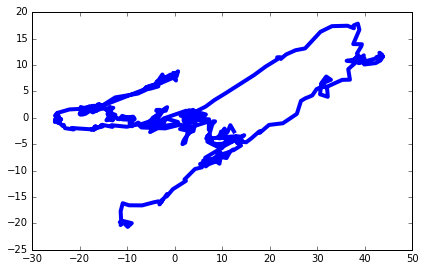

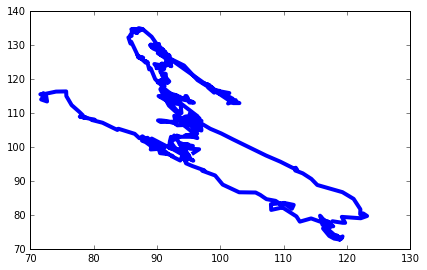

In [88]:
#alligned_traj = trajs[-4]

print alligned_traj.shape
plot(alligned_traj[::,0],alligned_traj[::,1])
figure()
print len(traj)
print traj[:2]
plot(traj[::,0],traj[::,1])


In [146]:
IPython.html.widgets import 

SyntaxError: invalid syntax (<ipython-input-146-266e439459f1>, line 1)

In [83]:
from IPython.html.widgets import interact, fixed,interact_manual
start = 0

def toi(time):
    #start = 100
    #time=max(time,start+1)
    #print traj[:time]
    plot_label(traj[start:time],cat[start:time],remove6=9)
    xlim(traj[start:,0].min(),traj[start:,0].max())
    ylim(traj[start:,1].min(),traj[start:,1].max())
    

interact(toi,time=(start,len(traj)))

NameError: name 'traj' is not defined

(array([  1.,   0.,   1.,   0.,   1.,   3.,   3.,   1.,   2.,   1.,   4.,
          3.,   5.,   3.,   5.,  10.,   5.,  14.,  16.,  12.,  14.,  22.,
         12.,   8.,   8.,   6.,   4.,   3.,   0.,   2.,   4.,   0.,   1.,
          3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([-3.49582278, -3.32168101, -3.14753924, -2.97339747, -2.7992557 ,
        -2.62511392, -2.45097215, -2.27683038, -2.10268861, -1.92854684,
        -1.75440506, -1.58026329, -1.40612152, -1.23197975, -1.05783797,
        -0.8836962 , -0.70955443, -0.53541266, -0.36127089, -0.18712911,
        -0.01298734,  0.16115443,  0.3352962 ,  0.50943797,  0.68357975,
         0.85772152,  1.03186329,  1.20600506,  1.38014684,  1.55428861,
         1.72843038,  1.90257215,  2.07671392,  2.2508557 ,  2.42499747,
         2.59913924,  2.77328101,  2.94742278,  3.12156456,  3.29570633,
         3.4698481 ,  3.64398987,  3.81813165,  3.99227342,  4.16641519,
 

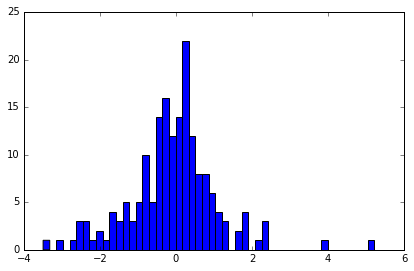

In [507]:
dx = traj[1:]-traj[:-1]
hist(dx[200:,0],bins=50)


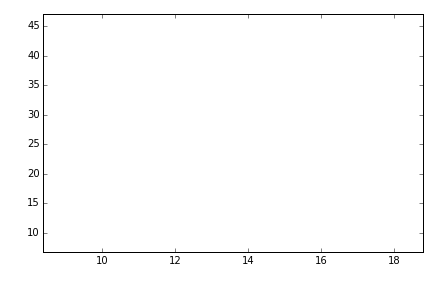
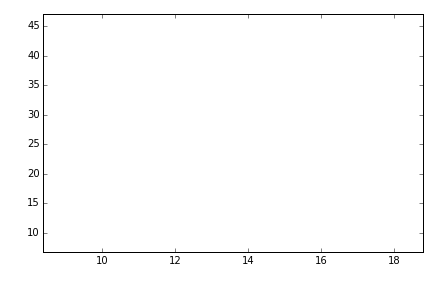
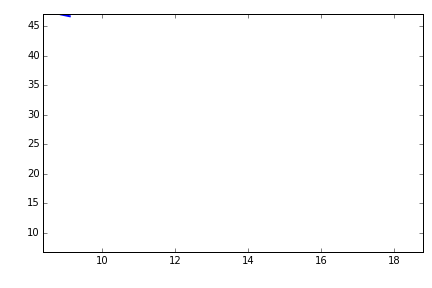
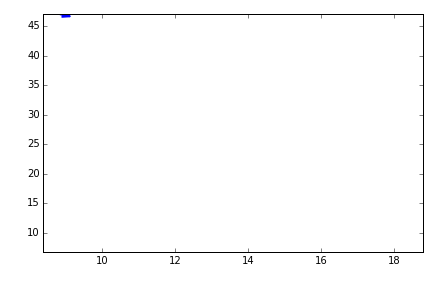
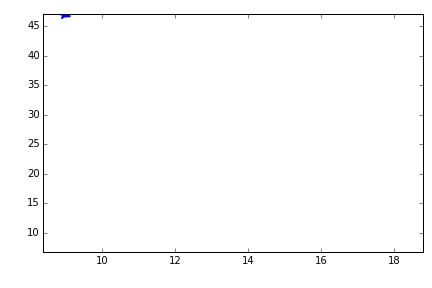
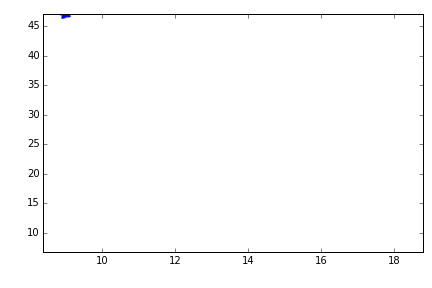
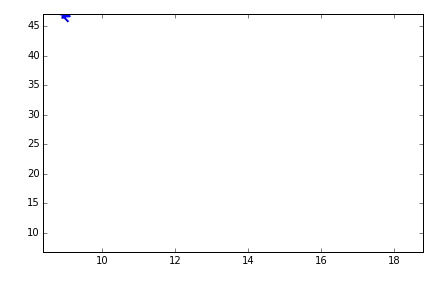
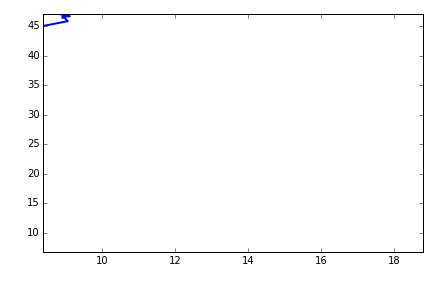
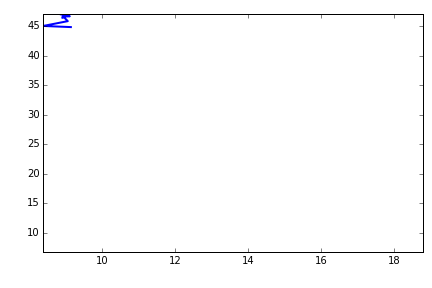
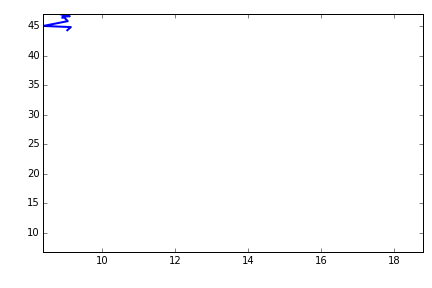
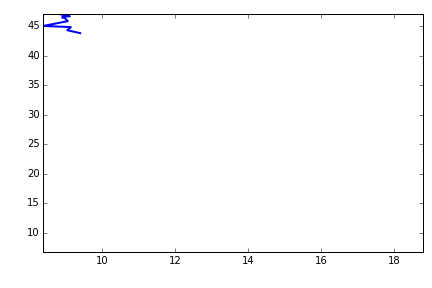
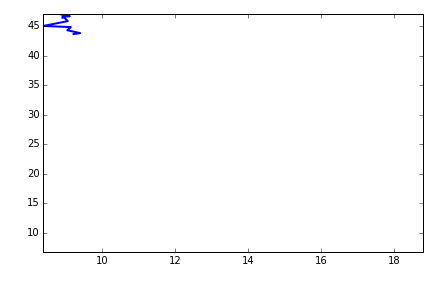
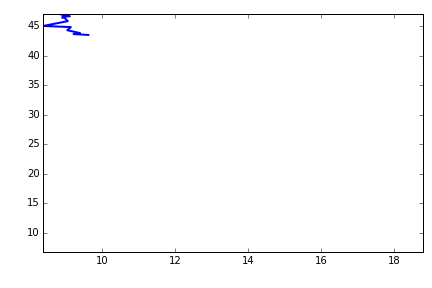
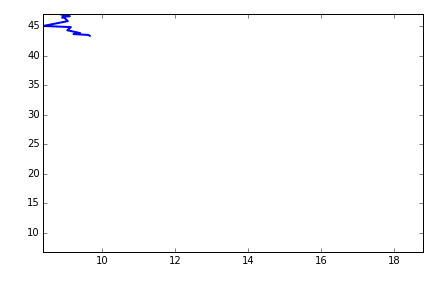
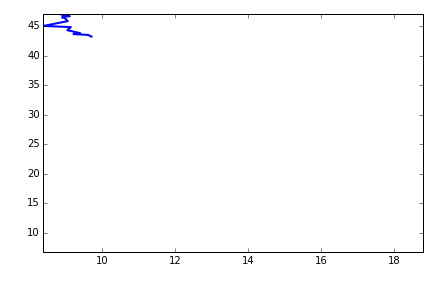
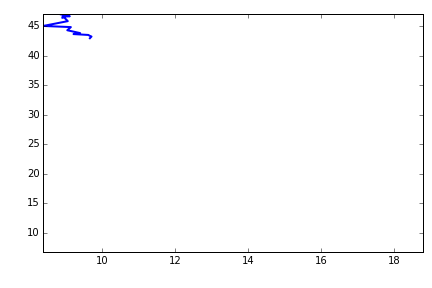
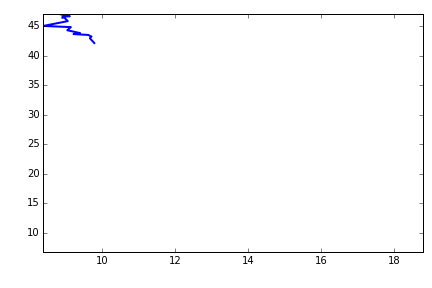
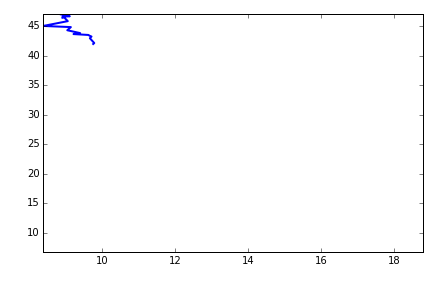
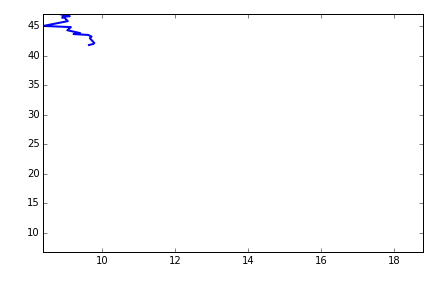
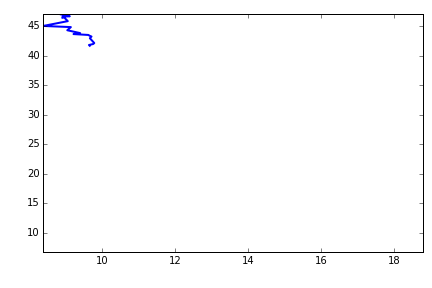
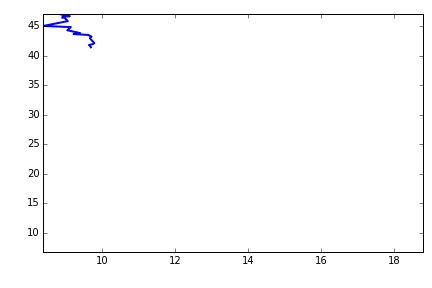
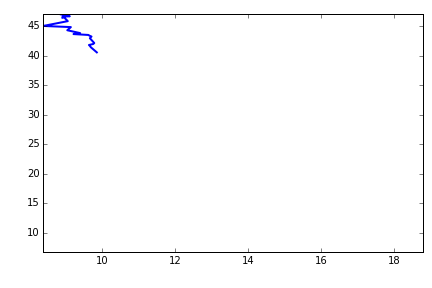
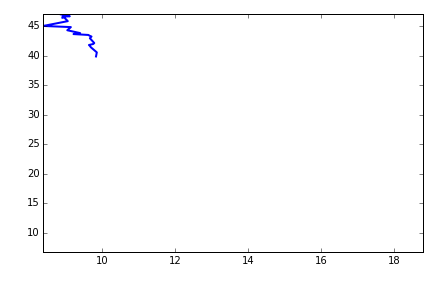
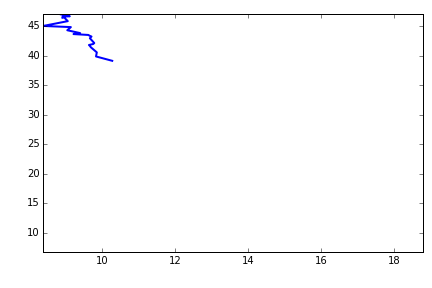
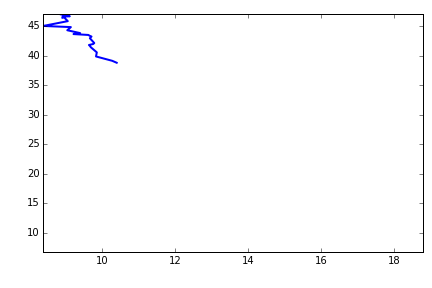
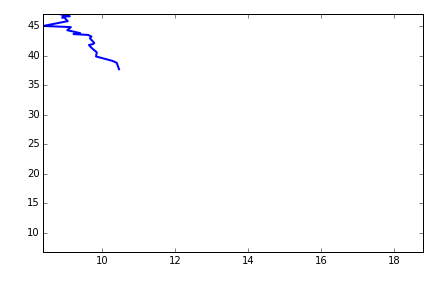
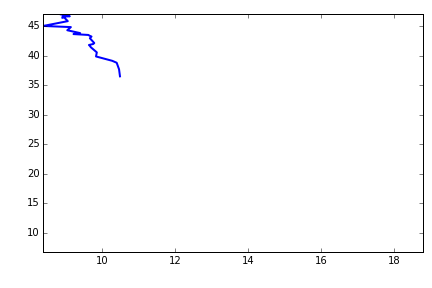
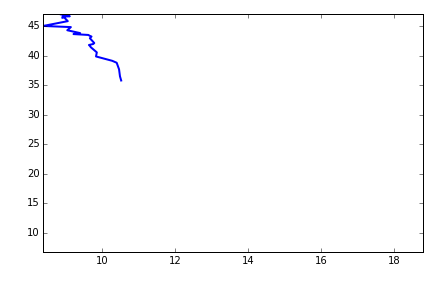
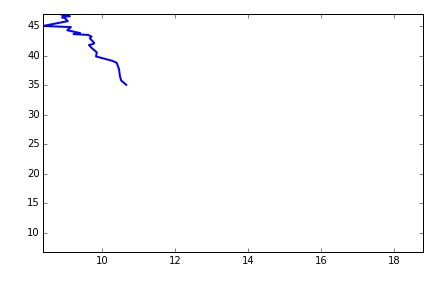
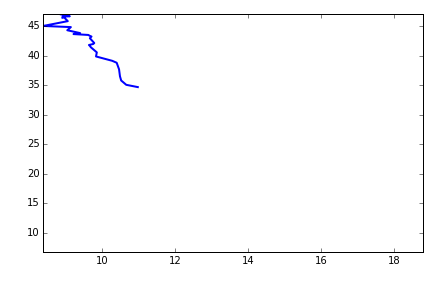
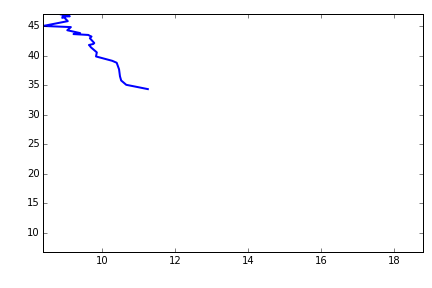
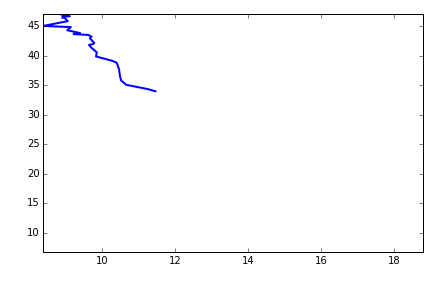
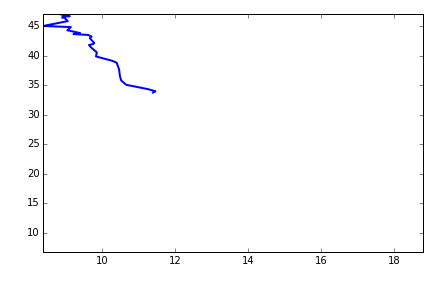
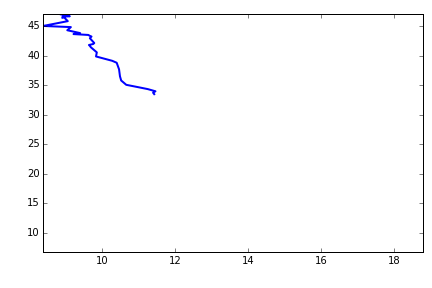
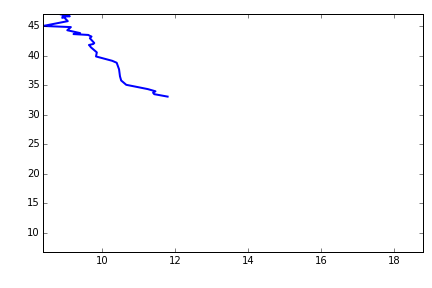
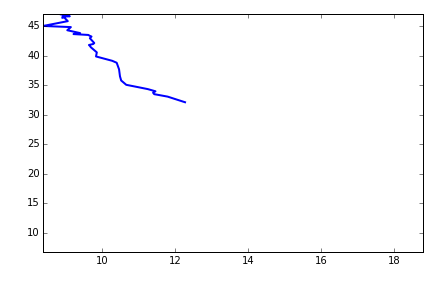
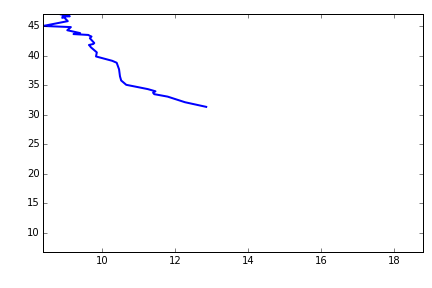
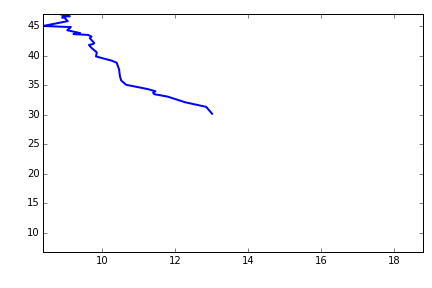
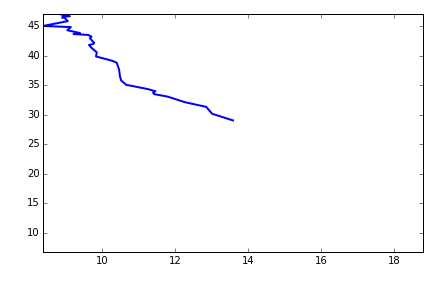
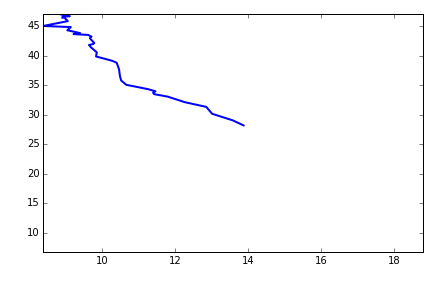
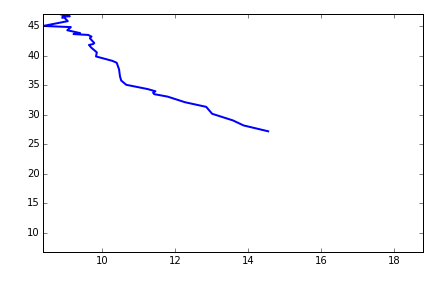
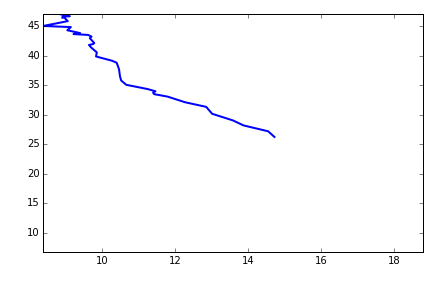
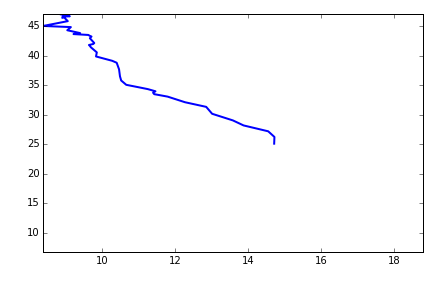
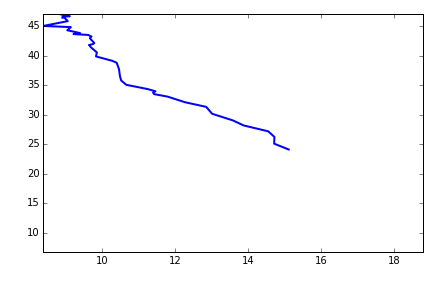
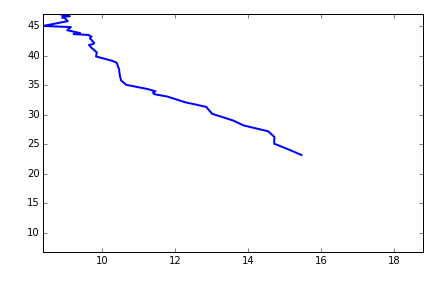
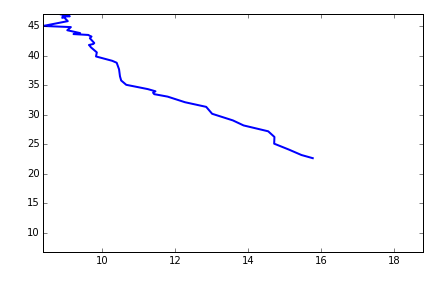
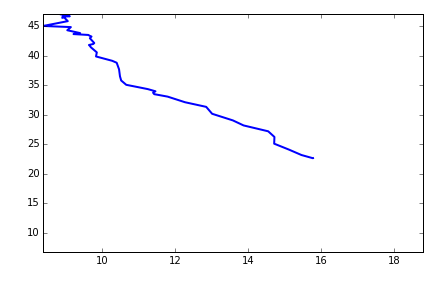
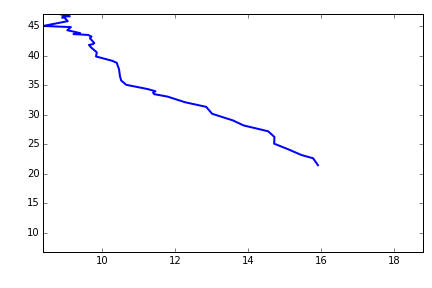
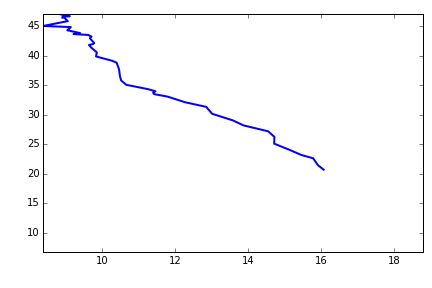
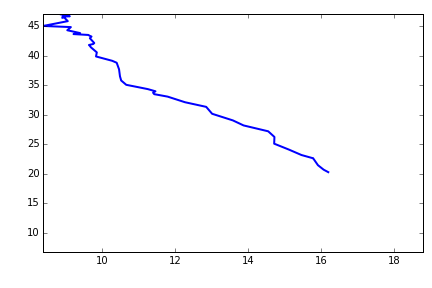
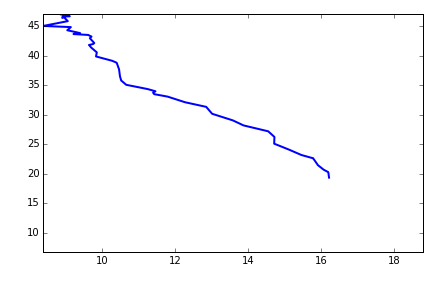
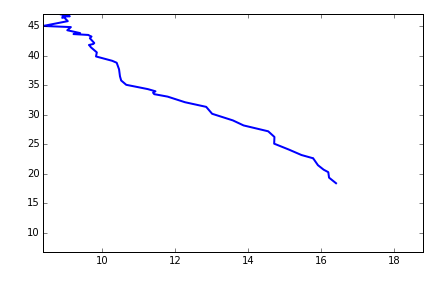
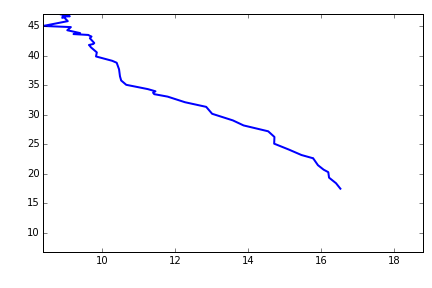
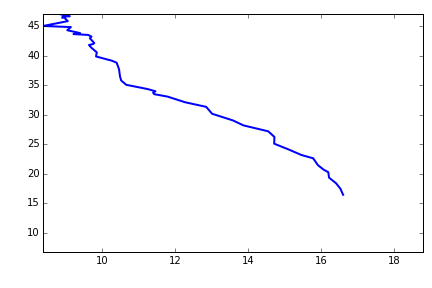
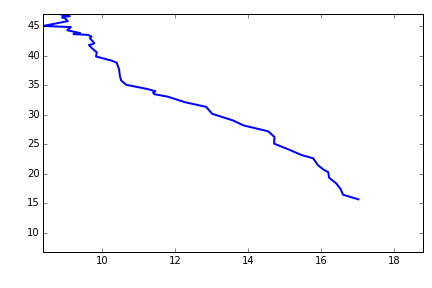
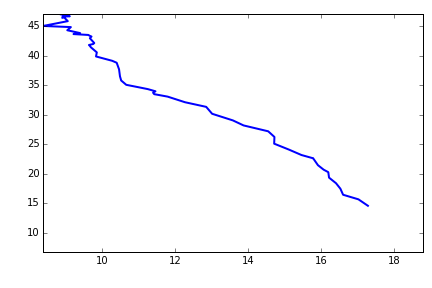
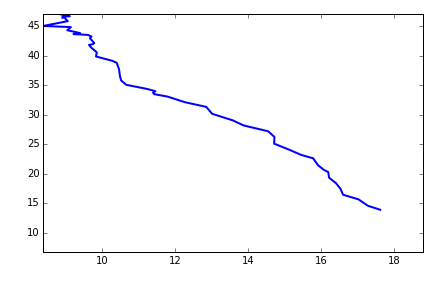
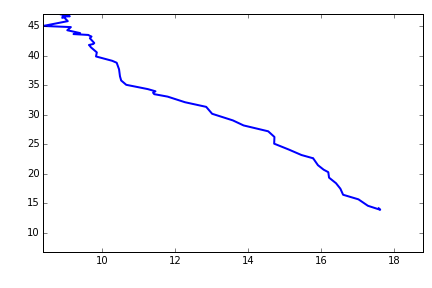
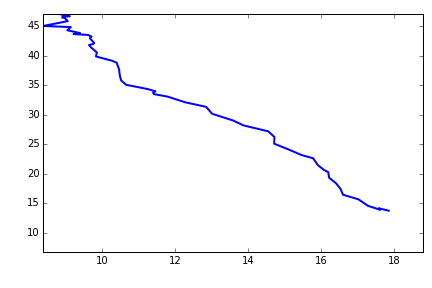
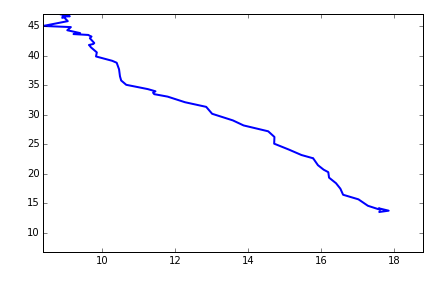
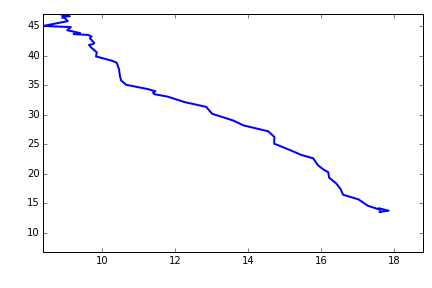
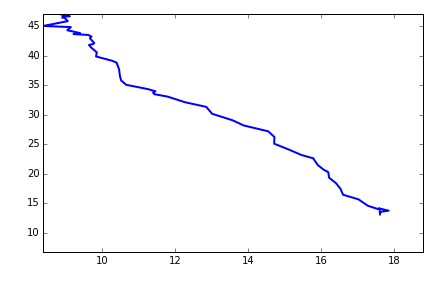
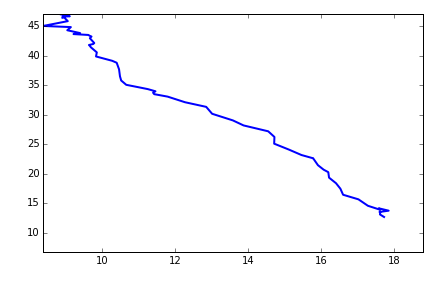
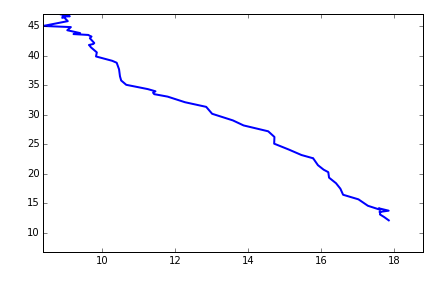
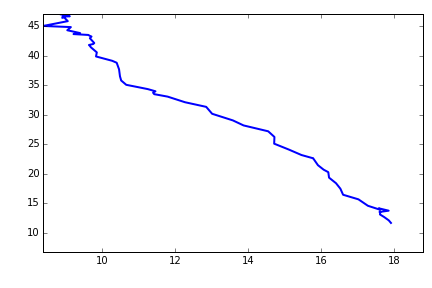
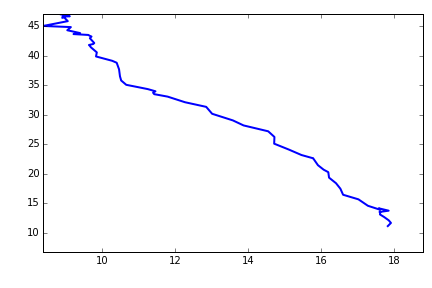
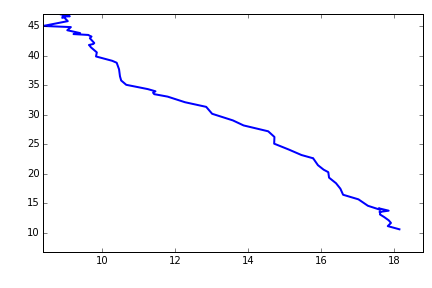
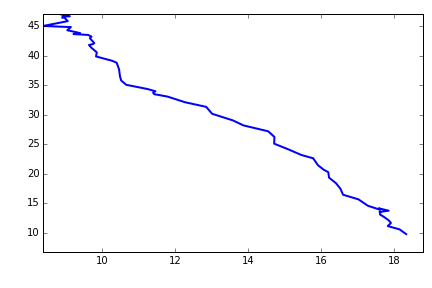
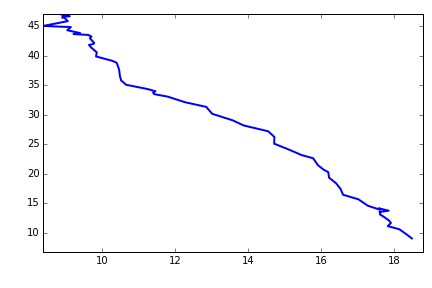
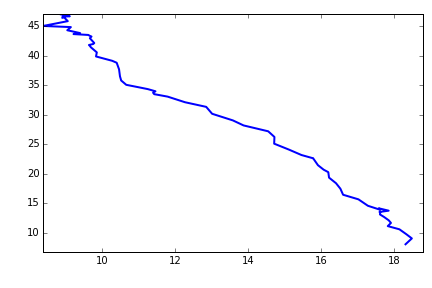
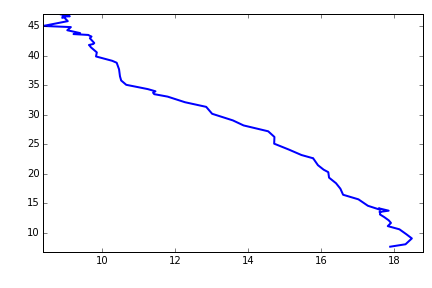
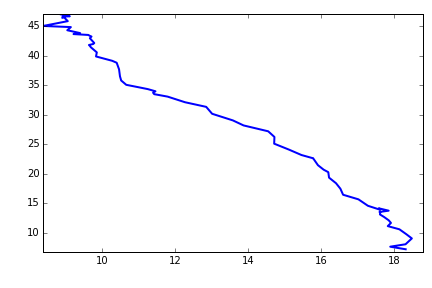
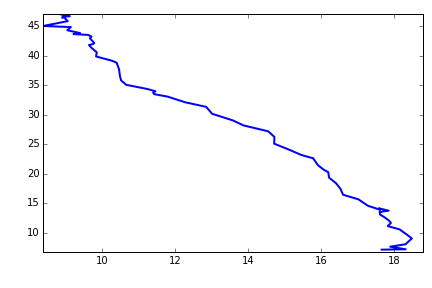
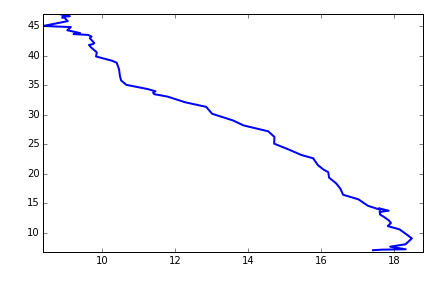
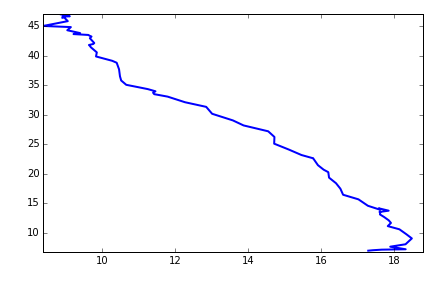
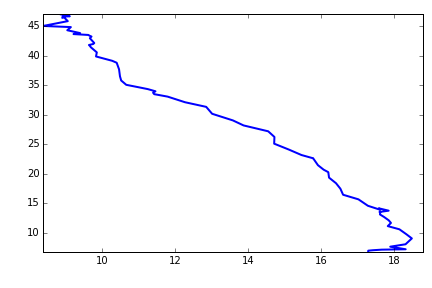
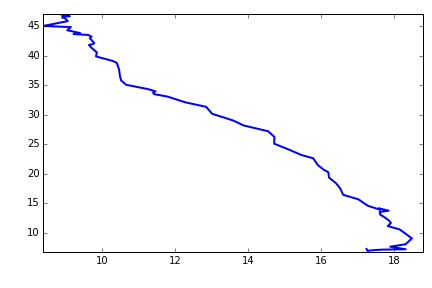
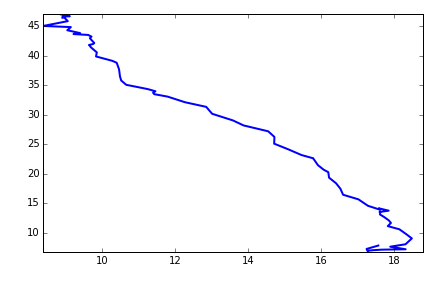
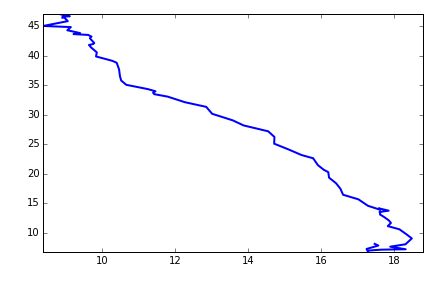
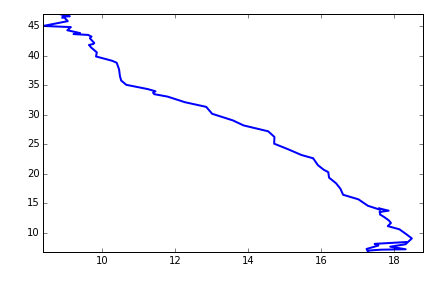
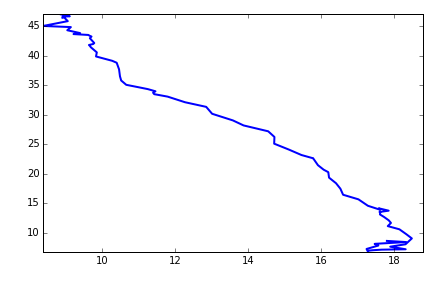
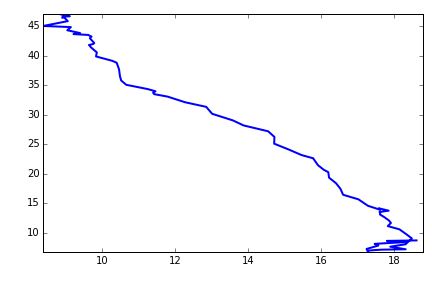
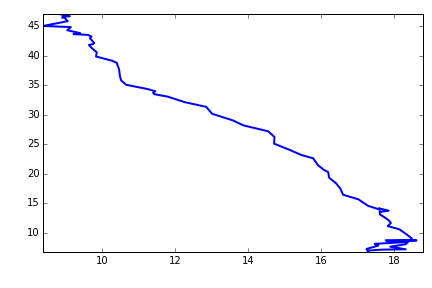
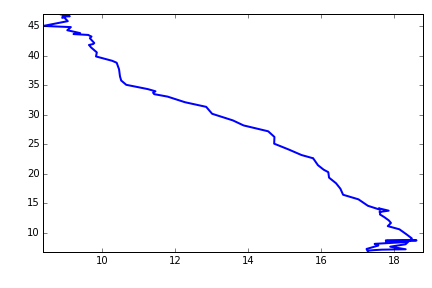
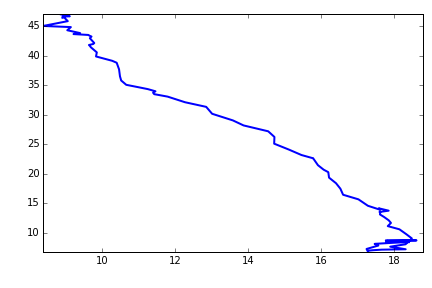
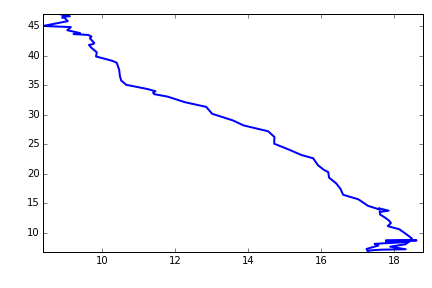
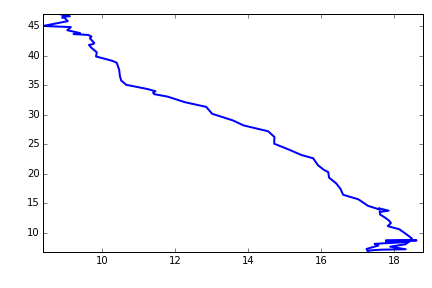
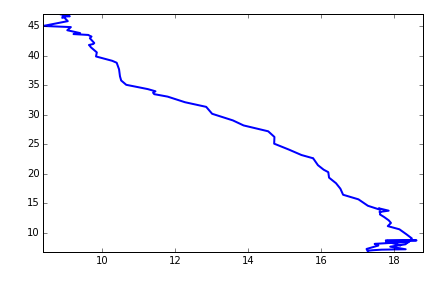
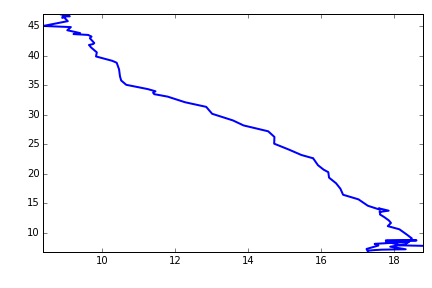
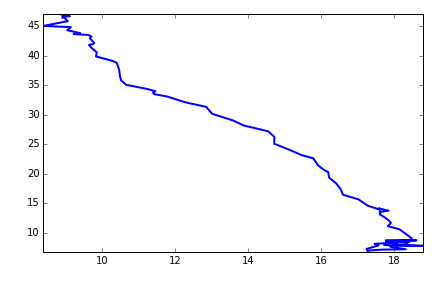
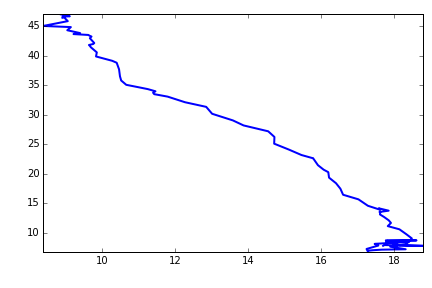
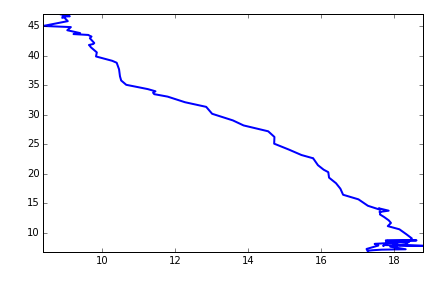
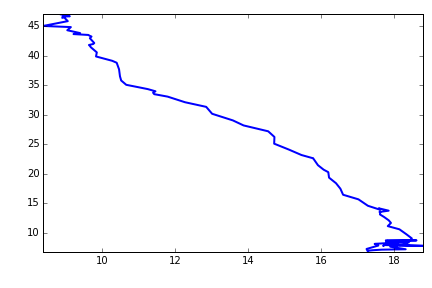
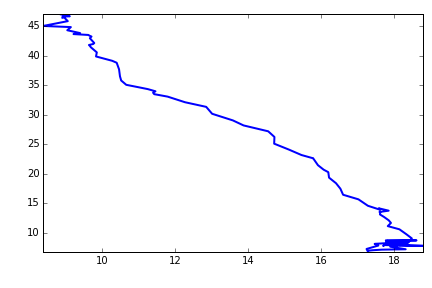
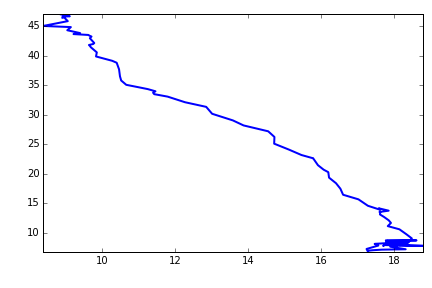
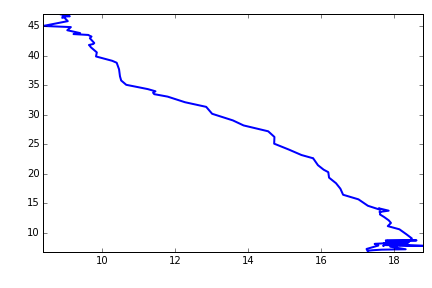
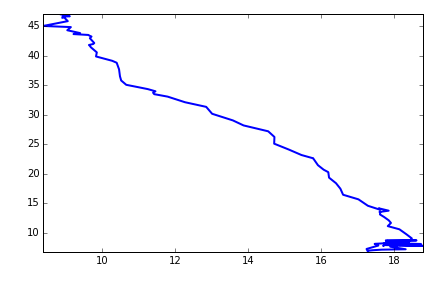
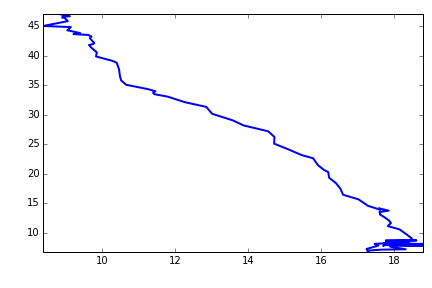
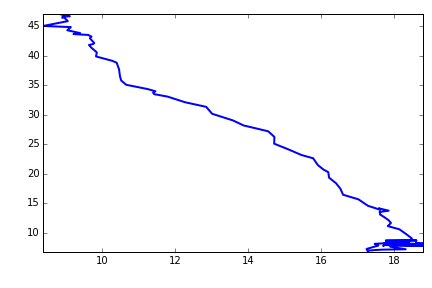
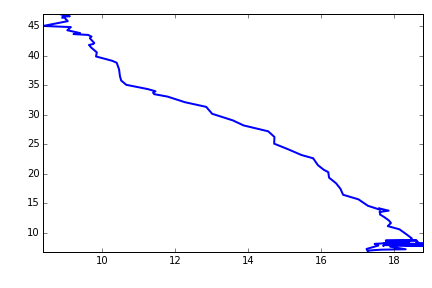
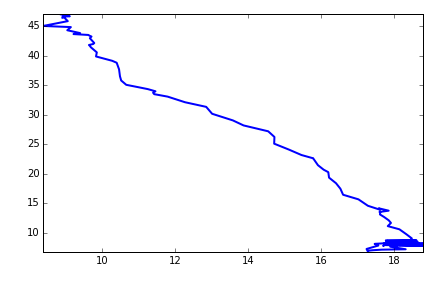
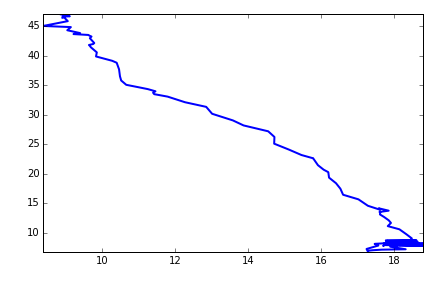
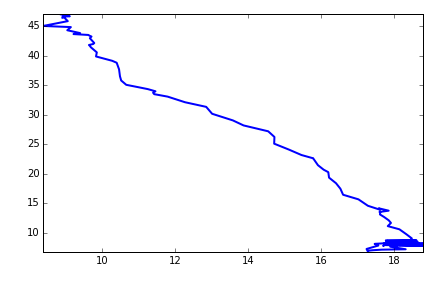
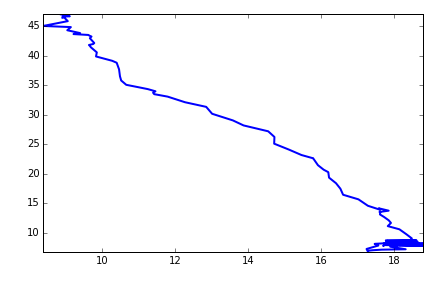
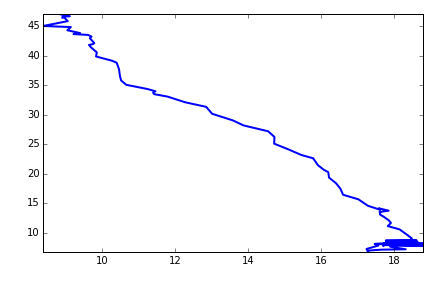
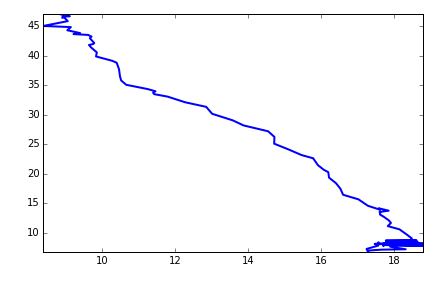
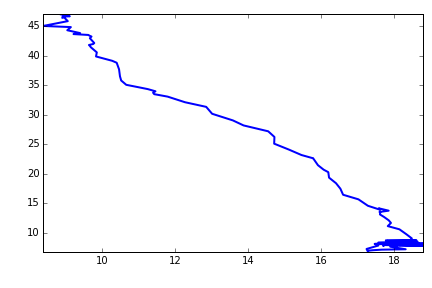
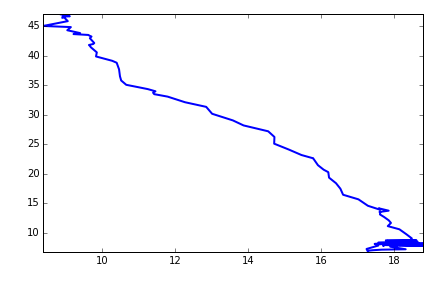
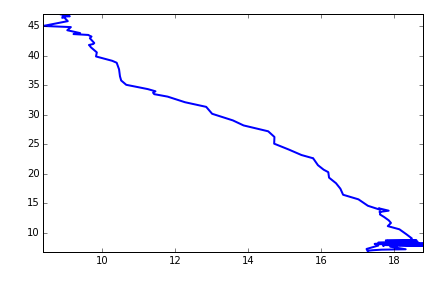
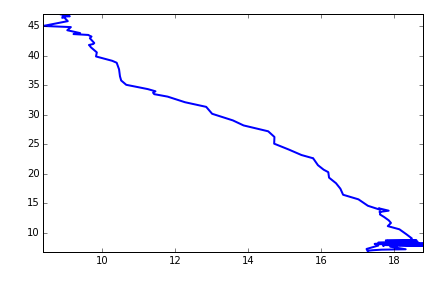
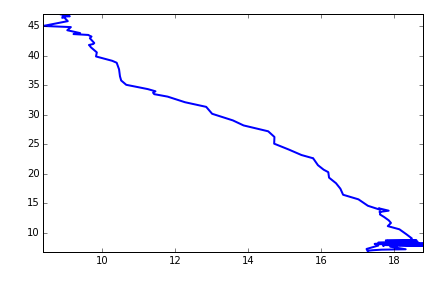
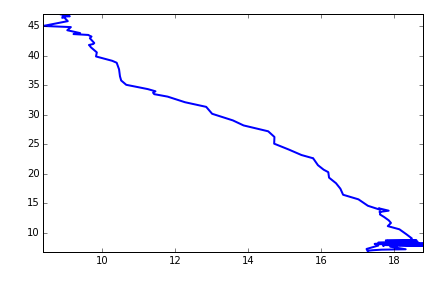
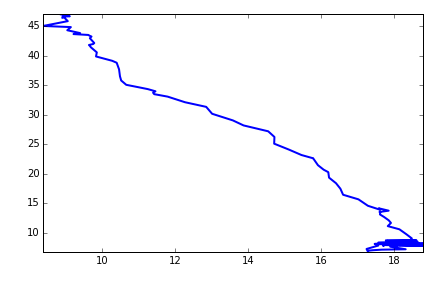
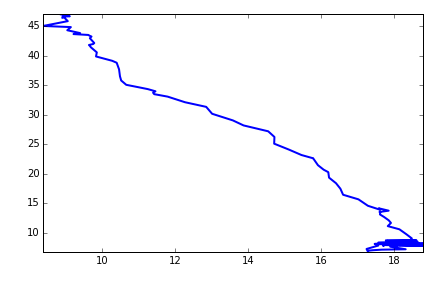
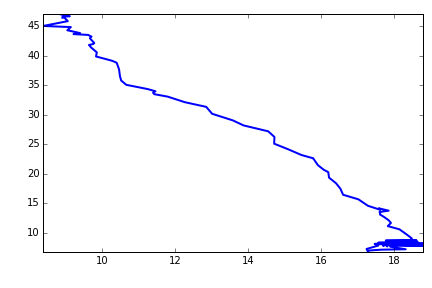
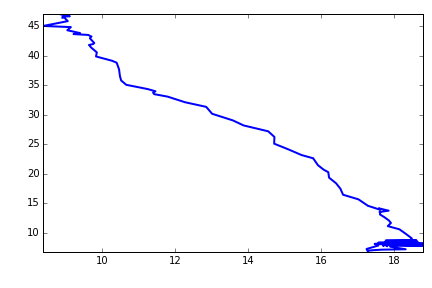
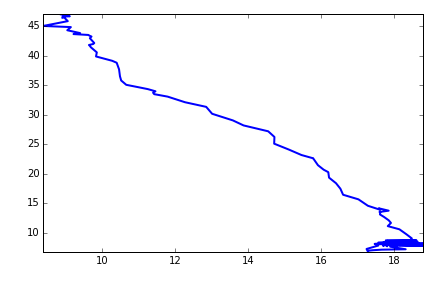
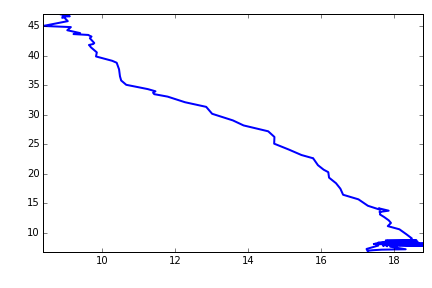
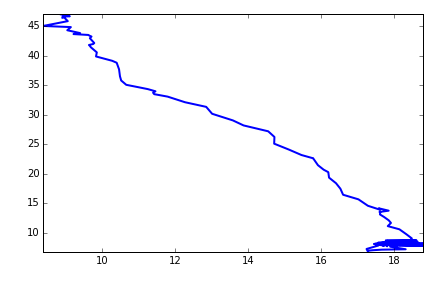
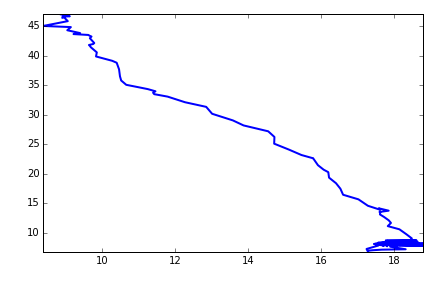
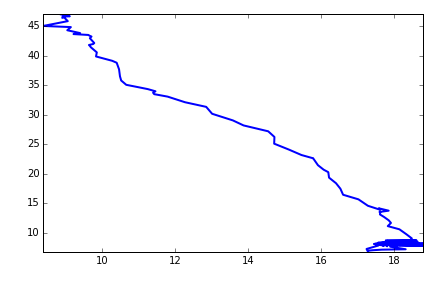
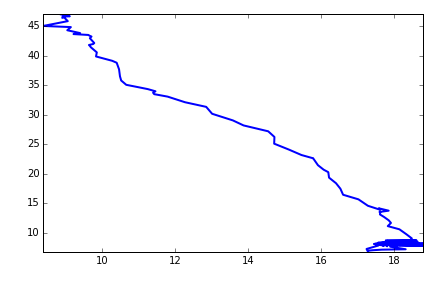
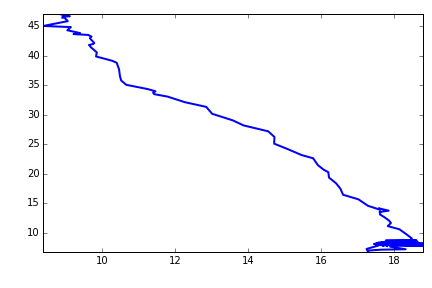
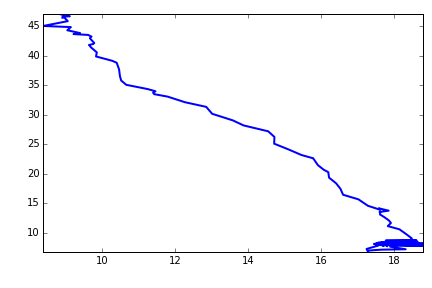

In [15]:
# JSAnimation import available at https://github.com/jakevdp/JSAnimation
from JSAnimation import IPython_display
from matplotlib import animation

# create a simple animation

x = traj[::,0]
y = traj[::,1]
fig = plt.figure()
ax = plt.axes(xlim=(x.min(), x.max()), ylim=(y.min(), y.max()))
line, = ax.plot([], [], lw=2)

#x = np.linspace(0, 10, 1000)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(x[:i],y[:i])
    return line,

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=len(x), interval=20, blit=True)

In [107]:
#Generate training 
X2 = []
Y2 = []
Y2_cat = []
step=4000

for j in range(0,3*20000,step):
    pred0 = graph.predict({"input1":np.array(X_train[j:j+step])}, batch_size=100)
    pred_RNN = pred0["output"]
    pred_RNN_cat = pred0["category"]
    #print pred_RNN.shape
    #print pred_RNN_cat.shape
    traj_length = len(X_train[j])
    #print traj_length
    len_ep = len(X_train[j:j+step])
    X2.append(np.concatenate((np.array(X_train[j:j+step]),pred_RNN,np.tile(pred_RNN_cat,traj_length).reshape(len_ep,
                                                                              traj_length,27)),axis=2))
    Y2.append(Y_trains[j:j+step]) 
    Y2_cat.append(Y_train_cat[j:j+step])

In [14]:
def global_process(X,batch_size=100,two=False):
    X = np.array(X)
    pred0 = graph.predict({"input1":X},  batch_size=batch_size)
    
    pred_RNN = pred0["output"]
    pred_RNN_cat = pred0["category"]
    
    if two:
        
        traj_length = len(X[0])
        len_ep = len(X)
        #print X.shape,pred_RNN.shape
        X2 = np.concatenate((X,pred_RNN,np.tile(pred_RNN_cat,traj_length).reshape(len_ep,
                                                                                  traj_length,27)),axis=2)

        pred1 =graph2.predict({"input1":X2},  batch_size=batch_size)
        pred_RNN = pred1["output"]
        pred_RNN_cat = pred1["category"]
        
    return pred_RNN ,pred_RNN_cat
    

In [209]:
X_test,Y_test,Y_test_cat,X_traj_test = generate_N_nstep(500,100)

Y_tests = Y_test 
X_traj_test = [["m",x] for x in X_traj_test]
#print X_traj_test.shape

#graph2.load_weights("transition_l9_7_0_diff_size_50")

In [87]:
from Specialist_layer import return_four_paper

graph4p = return_four_paper(ndim=2,inside = 50,permutation=True,inputsize=7)
graph4p.load_weights("paper_sub_simple_more_input_6_78")


In [76]:
#graph.save_weights("Allgood")
import cPickle
with open("/home/jarbona/Theano/test-set-diff_sigma_2.00-deltav_0.40-delta_sigma_directed_6.00_mat/"
          "test-set-diff_sigma_2.00-deltav_0.40-delta_sigma_directed_6.00.pick","r") as f:
    [X_test,Y_test,Y_tests,Y_test_cat,X_traj_test] = cPickle.load(f)
    
    

In [624]:
graph.load_weights("saved_weights/three_layer_trained_on_no_sub_anisentropy0_diffsigma1_delta_sigma_directed3")

In [457]:
graph.load_weights("saved_weights/three_bilayer_sub_bis")
graph.load_weights("sub_with_noise_25_18")
graph3.load_weights("without_noise_7_60")

In [210]:
from Tools import traj_to_dist
from Toolv1 import traj_to_dist2
Normed = []
for i in range(0,500):
    simple = True
    if simple:
        alligned_trajraj,normed,alpha,_ = traj_to_dist(X_traj_test[i][1][::,:3],ndim=2)
        alligned_trajraj,normed= traj_to_dist2(X_traj_test[i][1][::,:3],ndim=2)

    else:
        ndim=2
        real_traj = X_traj_test[i][1][::,:2]
        alligned_traj,normed,alpha,_ = traj_to_dist(real_traj,ndim=ndim)
        real_traj1 = np.array([Propertie(real_traj[::,0]).smooth(2),
                               Propertie(real_traj[::,1]).smooth(2)])
        alligned_traj1,normed1,alpha1,_ = traj_to_dist(real_traj1.T,ndim=ndim)
        real_traj2 = np.array([Propertie(real_traj[::,0]).smooth(10),
                               Propertie(real_traj[::,1]).smooth(10)])
        alligned_traj2,normed2,alpha2,_ = traj_to_dist(real_traj2.T,ndim=ndim)

        normed = np.concatenate((normed,normed1,normed2),axis=1)
    
    Normed.append(normed)
Normed = np.array(Normed)

In [27]:
#graph3.load_weights("pure_miss_9_88")
#graph3.load_weights("saved_weights/pure_3D_8_54")
#graph3.load_weights("saved_weights/without_noise_7_6")

In [131]:
graph4p.load_weights("paper_sub_simple=False,diff_sigma=2.0,delta_sigma_directed=6.,ndim=2,anisentropy=0.1,deltav=.4,rho_fixed=False,random_rotation=False_withnoise_16_138")

In [211]:
import glob
from Tools import get_statistiques
ls = glob.glob("pure*")
ls.sort()
ls = ["pure_traj_2_48_diff_size_50"]
for weigh in ls:
    #graph.load_weights(weigh)
    pred_RNN = []
    pred_RNN_cat = []
    for i in range(0,500,100):
        pred0 = graph4p.predict({"input1":np.array([t for t in Normed[i:i+100]])},batch_size=100)
        #print pred0["category"][::,0,8:10][::,::-1].shape
        #pred0["category"][::,0,8:10] = pred0["category"][::,0,8:10][::,::-1]
        pred_RNN.extend(pred0["output"])
        pred_RNN_cat.extend(pred0["category"])
        
    
    #print pred_RNN_cat[0].shape[1]

    
    pred_RNN_cat = np.array(pred_RNN_cat)[::,newaxis,::]

    P_m,N_m,conf_m,P_c,N_c,conf_c = get_statistiques(Y_tests, Y_test_cat,pred_RNN,pred_RNN_cat,fight=False,sub=True)

    print weigh ,P_m,N_m , P_c,N_c


pure_traj_2_48_diff_size_50 22.1656565657 49500 39.2 500


In [388]:
#X = sub_confined_in_sphere(1,3,400,show=True)
#graph3.save_weights("tmp")

(500, 1, 27)
22.1656565657 49500
[[20017     6  3870   621   120]
 [    0     0     0     0     0]
 [ 5800    18 18511   472    65]
 [    0     0     0     0     0]
 [    0     0     0     0     0]]
39.2 500
[[  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [ 16   2   3 304   1   0   0 164   0   0  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]]


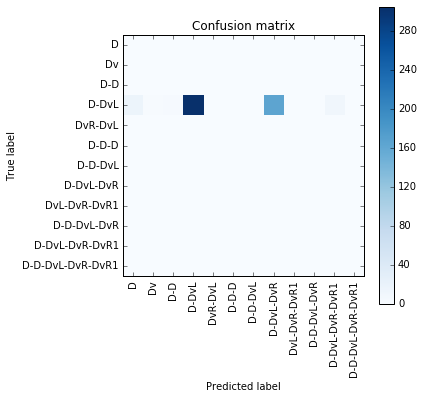

In [212]:
from Tools import get_statistiques,plot_confusion_matrix,M0
from sklearn.metrics import confusion_matrix

print pred_RNN_cat.shape
P_m,N_m,conf_m,P_c,N_c,conf_c = get_statistiques(Y_tests,
                                                 Y_test_cat,pred_RNN,pred_RNN_cat[::,::,:len(M0)],
                                                 fight=True,sub=False)

print P_m,N_m
print conf_m

print P_c,N_c
print conf_c

f = figure(figsize=(10,5))
ax = f.add_subplot(121)
plot_confusion_matrix(conf_c,labels=M0,rotation=90)

In [428]:
sub_confined_in_sphere(1,3,400,show=True)

N_contact 23


array([[ 0.27911984,  0.12025728,  0.00652644],
       [ 0.75145787, -0.47950455, -0.93022534],
       [ 1.35310379,  0.41257811, -0.93541951],
       ..., 
       [ 0.1365192 ,  3.73916146,  0.06854599],
       [-0.17117002,  3.99877722, -1.81034593],
       [ 0.47257436,  4.16433552, -0.72945072]])

In [103]:
print np.sum(RNN[:30] != GT[:30])
print GT[:30]
i=13
classi = np.argmax(proba,axis=-1)
print classi
print np.argmax(Y_tests[i],axis=-1)

NameError: name 'RNN' is not defined

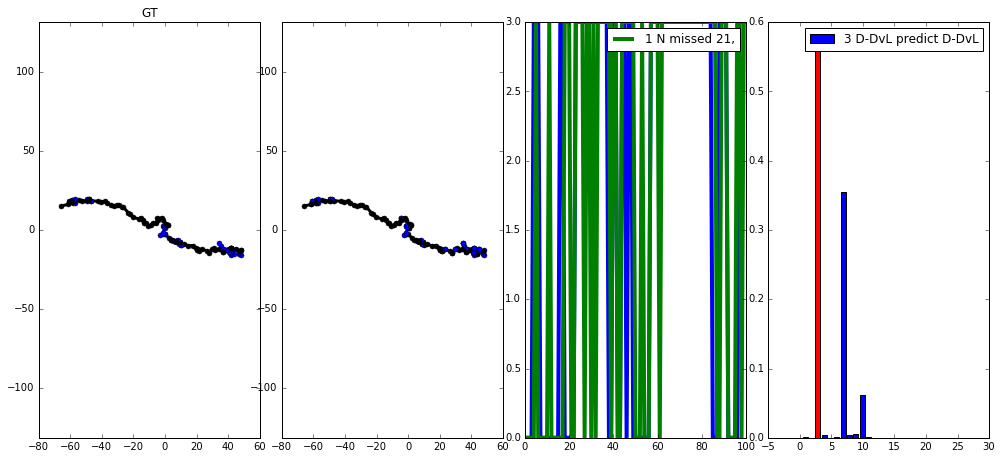

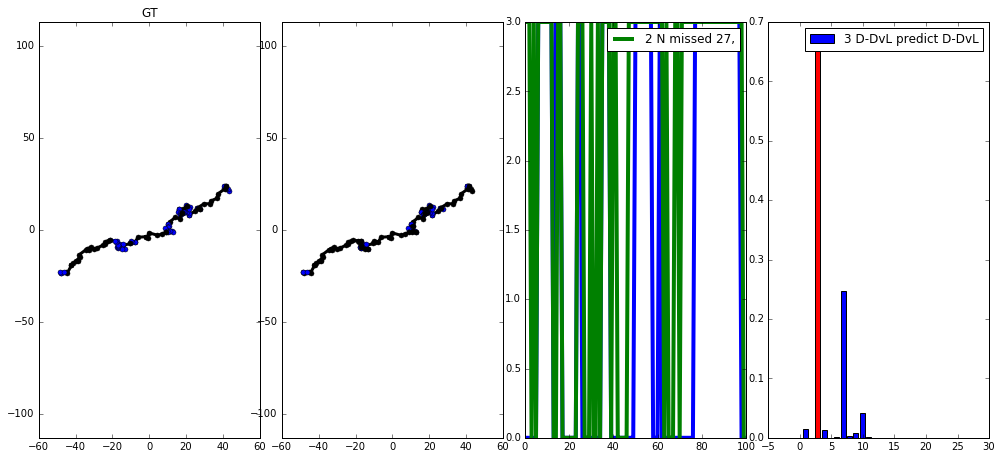

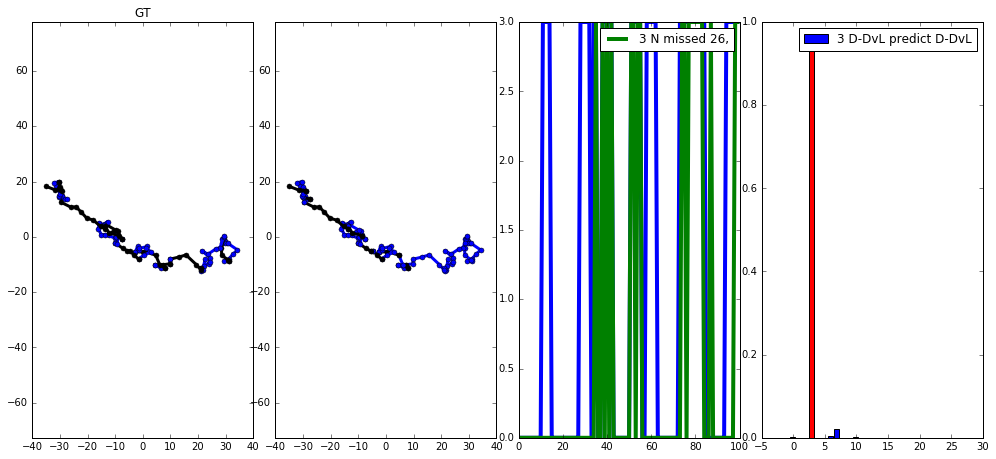

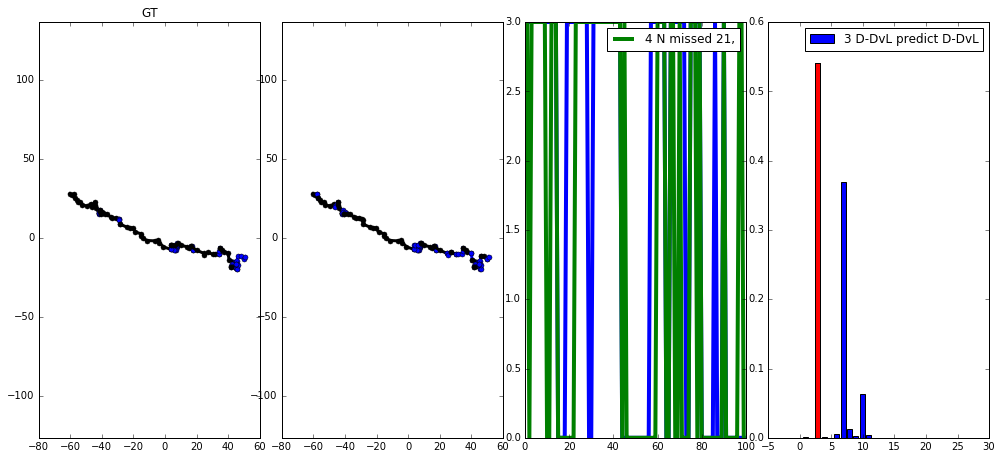

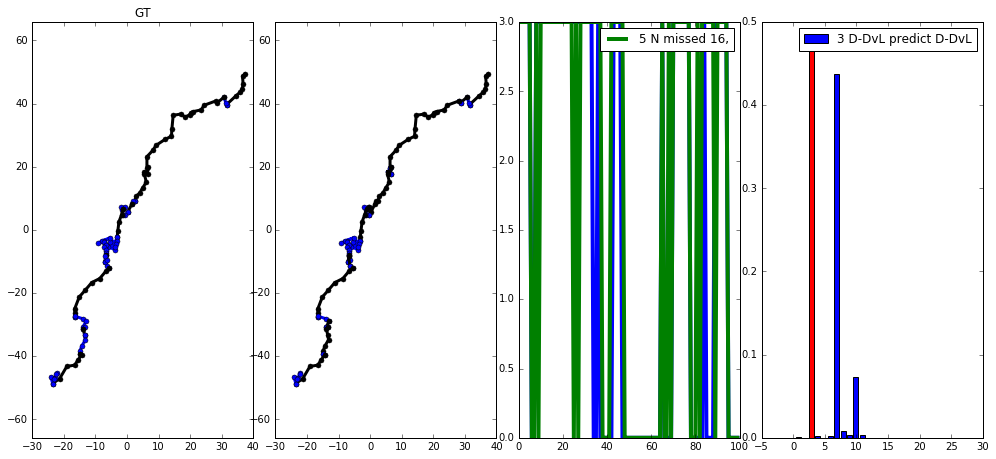

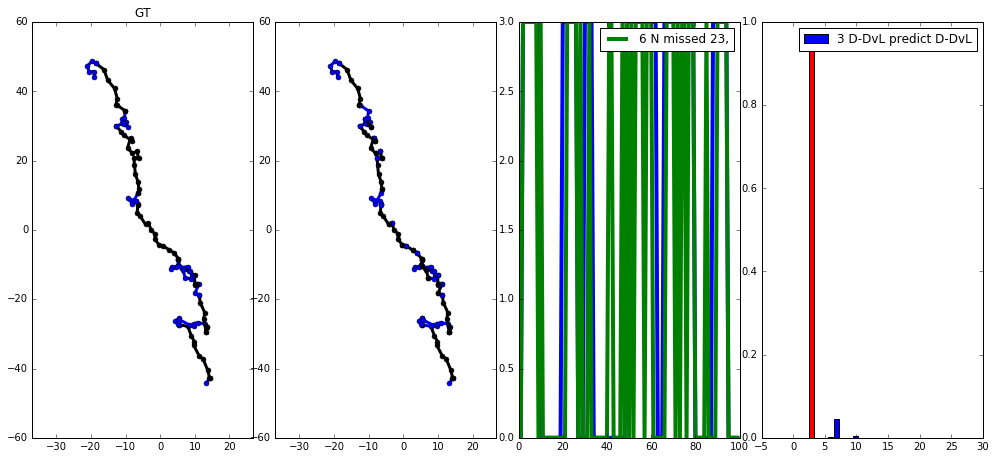

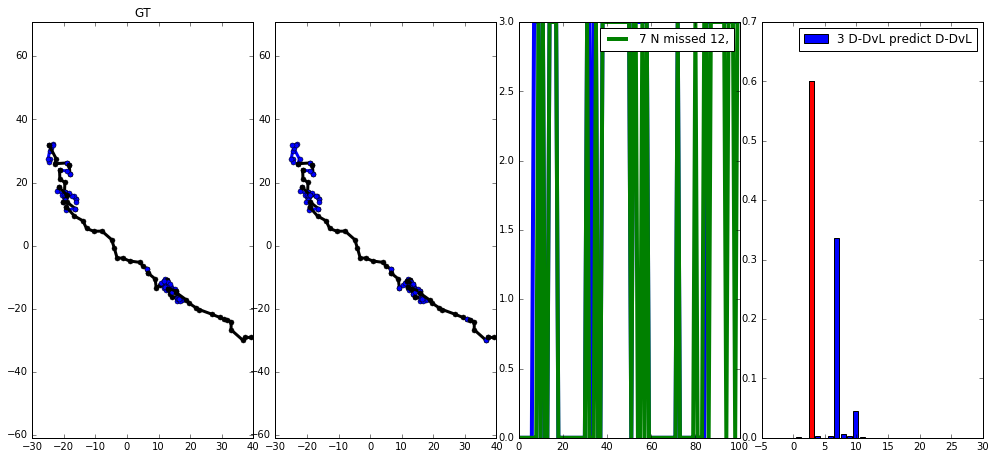

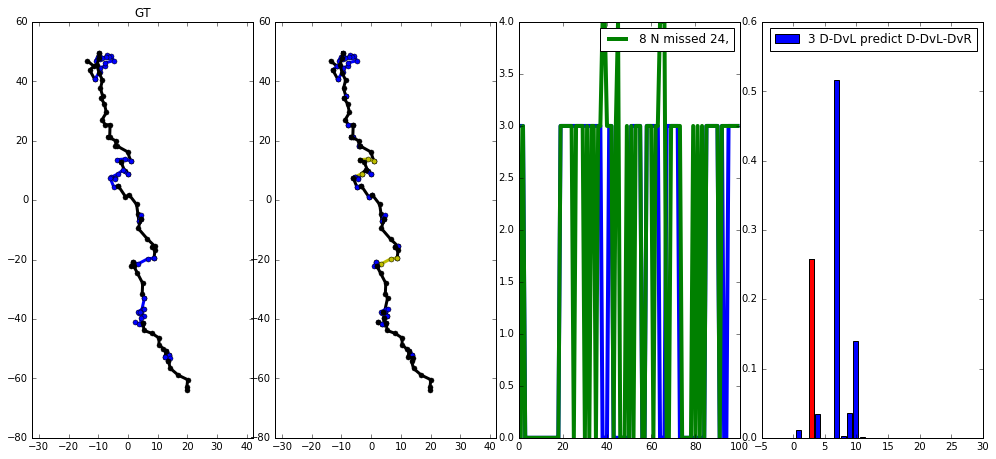

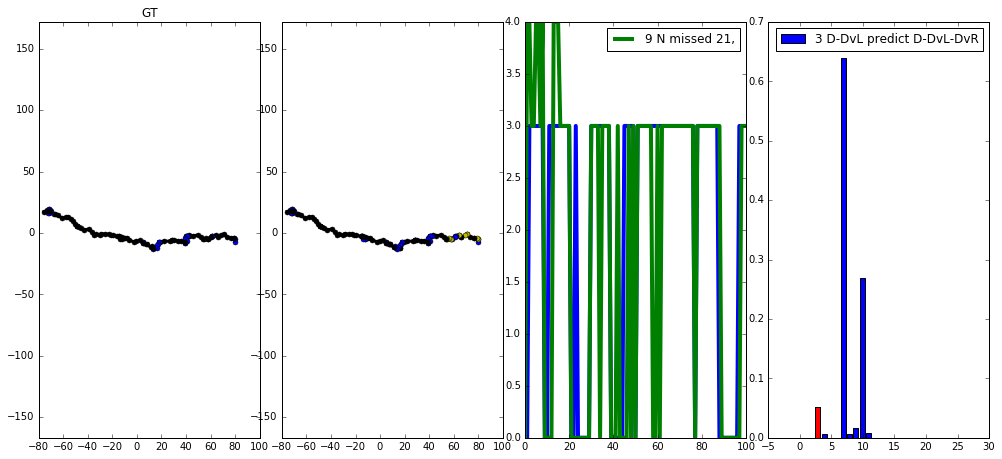

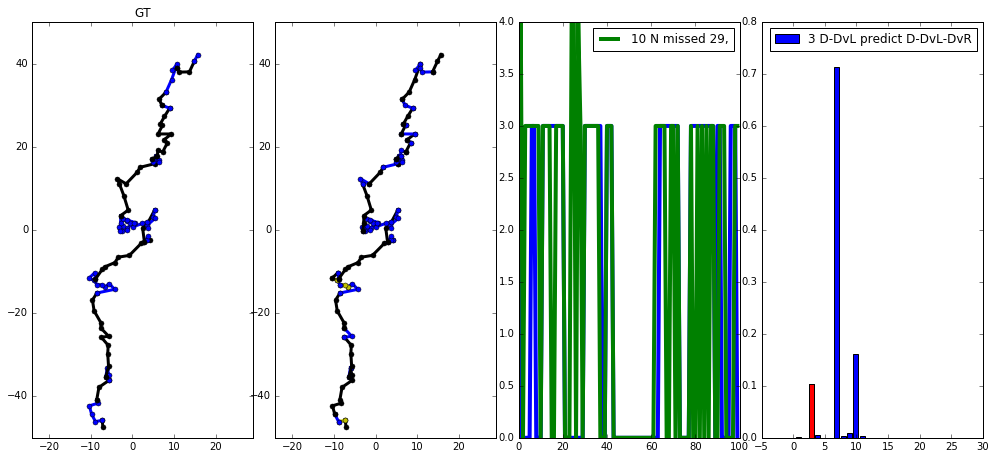

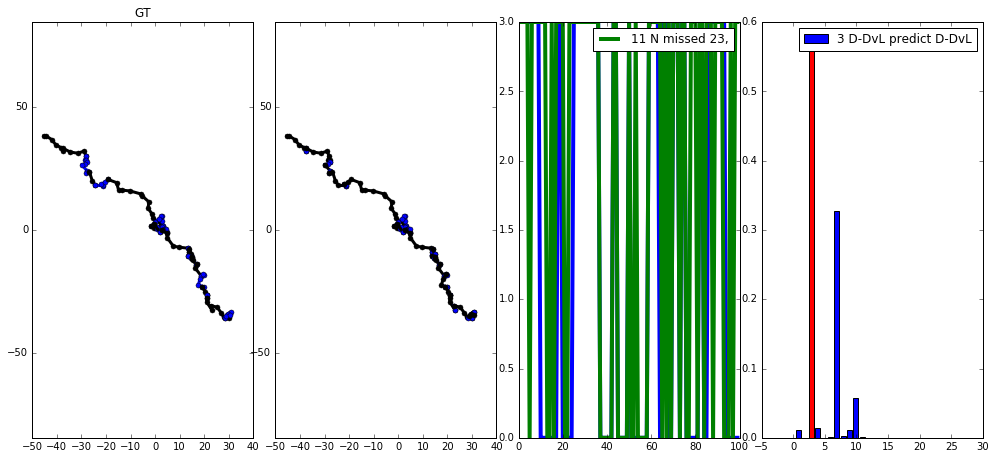

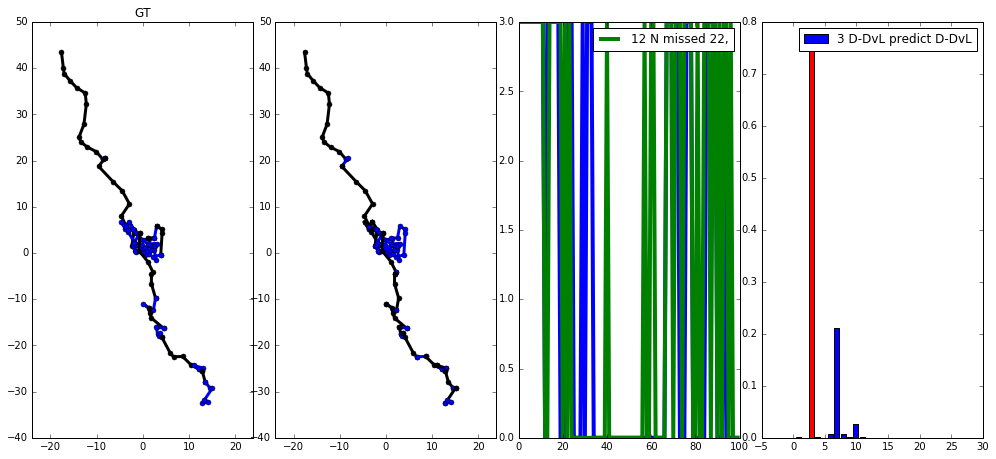

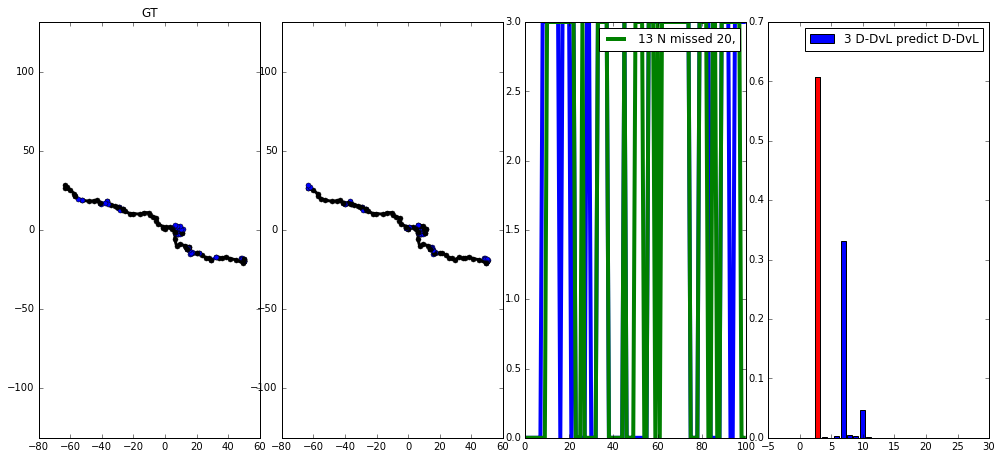

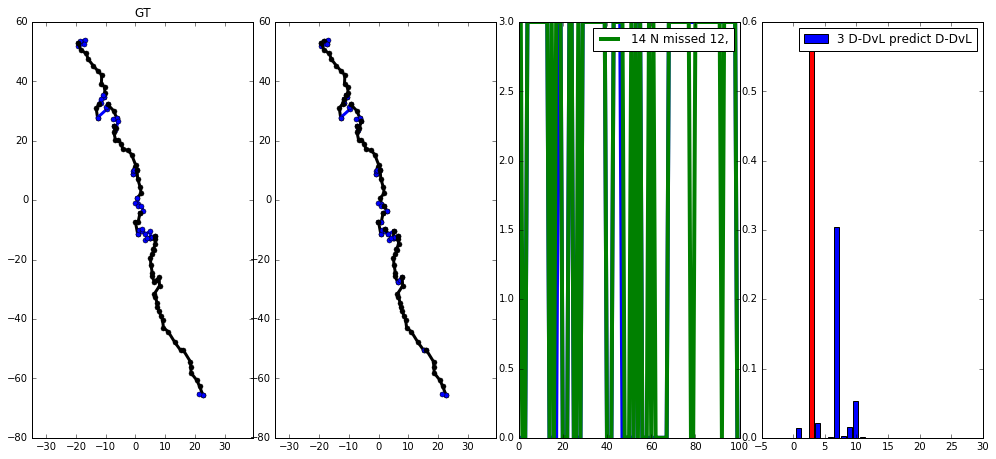

In [213]:
from Tools import plot_label,Labels,M0,clean,M1
#print score.shape
#import matplotlib as plt
l = 200
for i in range(1,15,1):
    
    init = np.argmax(Y_tests[i],axis=-1)

    proba = pred_RNN[i] #/ np.sum(pred[i],axis=1)[::,newaxis]
    classi = np.argmax(proba,axis=-1)
    
    delta_RNN = np.sum(classi!= init[:l]) 

    #if  np.argmax(Y_test_cat[i,0]) != 12:
    #    continue

    #if  np.argmax(Y_test_cat[i][0]) != 14:
    #    continue

    perm = np.array([[0, 1, 2, 3, 4, 5, 6]+range(7,10),
                 [0, 1, 2, 4, 5, 3, 6]+range(7,10),
                 [0, 1, 2, 5, 4, 3, 6]+range(7,10),
                 [0, 1, 2, 3, 5, 4, 6]+range(7,10),
                 [0, 1, 2, 4, 3, 5, 6]+range(7,10),
                 [0, 1, 2, 5, 3, 4, 6]+range(7,10)],dtype=np.int)
    deltas = []
    for permutation in perm:
        classi_RNN = clean(pred_RNN[i][:l,permutation],np.argmax(pred_RNN_cat[i]),fight=False,sub=True)

        deltas.append(np.sum(classi_RNN != init[:l]) )

    best = np.argmin(deltas)
    classi_RNN = clean(pred_RNN[i][:l,perm[best]],np.argmax(pred_RNN_cat[i]),fight=False,sub=True)
   
    #if gt == pcat:
    #   continue
    
    #if gt not in [4,7,8]:
    #    continue
    #classi=proba
    #print np.sum(classi != init) 
    #if np.sum(classi[:l] != init[:l]) < 100:
    #    continue
    fig = figure(figsize=(15,7))
    ax = fig.add_subplot(141)
    ax.set_title("GT")
    #plot(np.cumsum(X_test[i]))
    #ax = fig.add_subplot(121)
    
   
    
    #plot_traj(X_test[i][:l],init[:l],random_sin=random_sin)
    plot_label(X_traj_test[i][1][:l],init[:l],remove6=30)
    #plot(X_traj_test[i][2][:l,0],X_traj_test[i][2][:l,1])
    plt.axis('equal')
    
    ax = fig.add_subplot(142)
    
    plot_label(X_traj_test[i][1][:l],classi_RNN[:l],remove6=30)
    plt.axis('equal')
    
    ax = fig.add_subplot(143)
    plot( init[:l])
   
    plot(classi_RNN[:l],label="%i N missed %i,"%(i,np.sum(classi_RNN[:l] != init[:l])))
    legend()
    
    ax = fig.add_subplot(144)
    #print pred_RNN_cat[i,0].shape
    #print pred_RNN_cat[i].shape
    pcat  = pred_RNN_cat[i][0]
    bar(np.arange(len(pcat))-0.5,pcat,label= "%i %s predict %s"%(np.argmax(Y_test_cat[i]),
                                                                  M1[np.argmax(Y_test_cat[i])],
                                                                    M1[np.argmax(pcat,-1)]))
    gt = np.argmax(Y_test_cat[i][0])
    bar(gt-0.5,pcat[gt],color="r")
    #xticks(range(27), M0,rotation=90)

    legend()
    


/usr/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:476: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


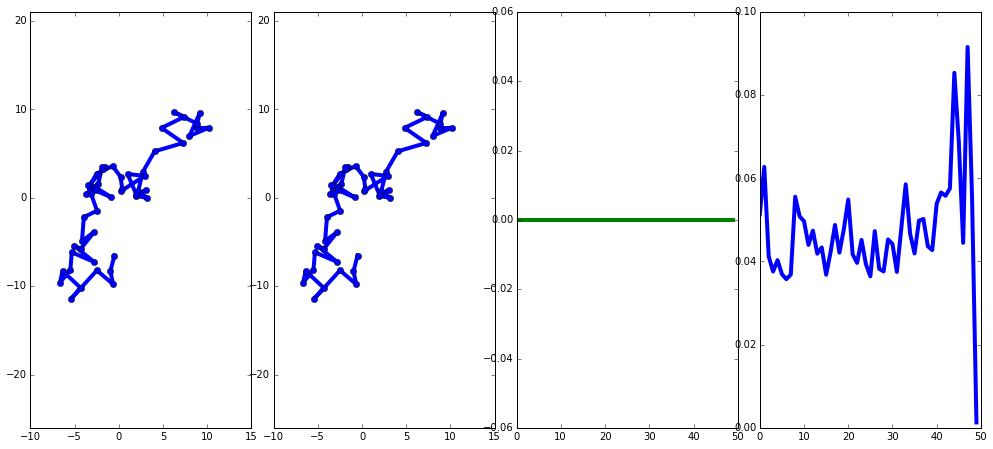

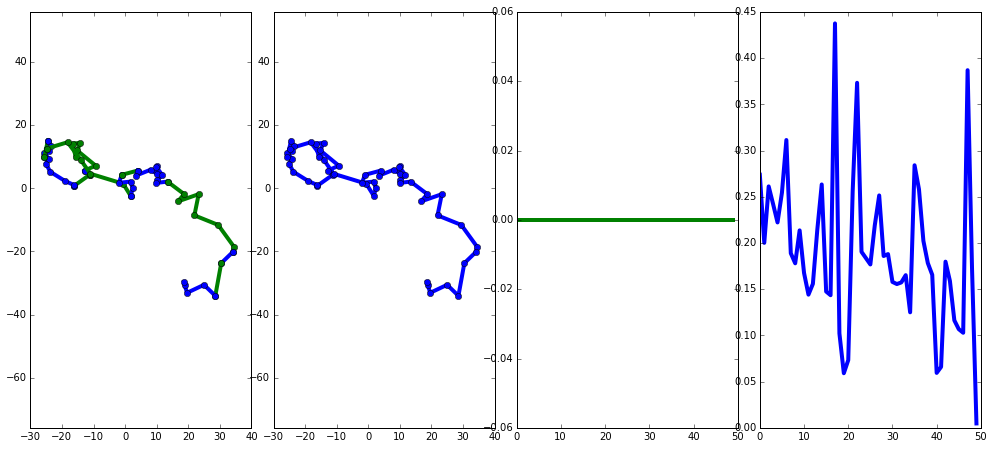

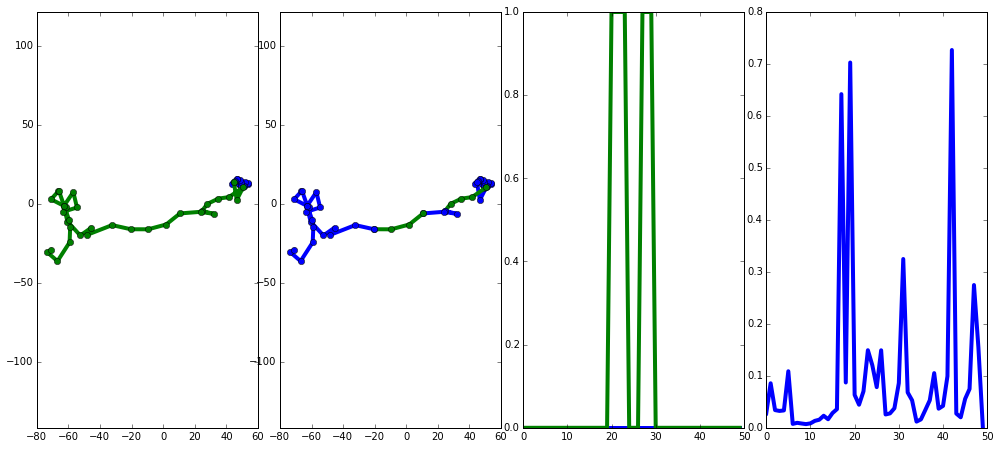

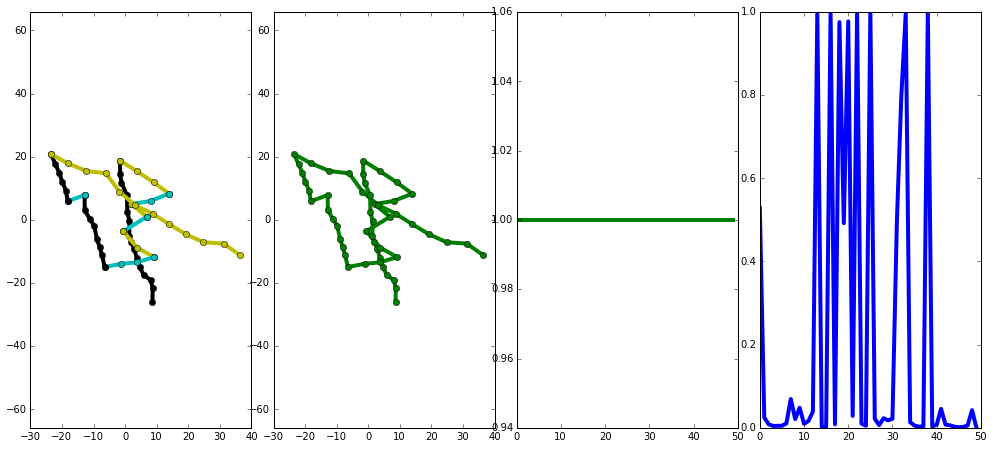

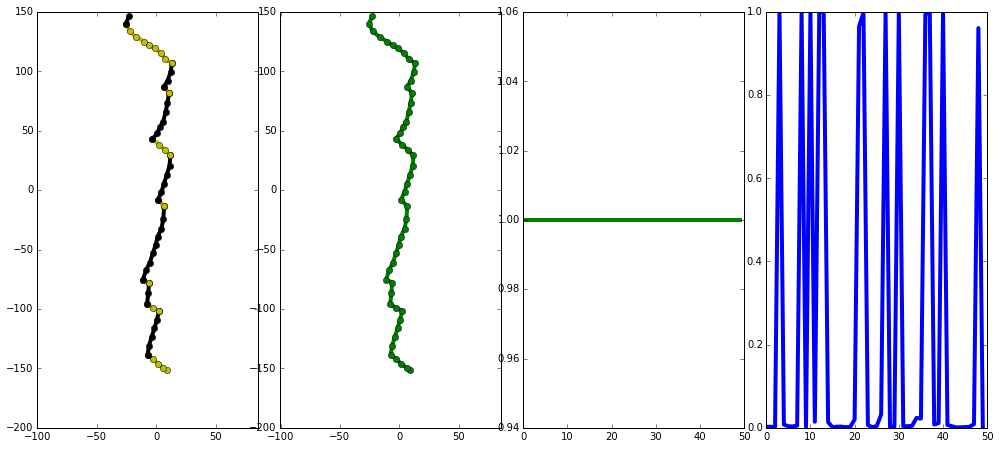

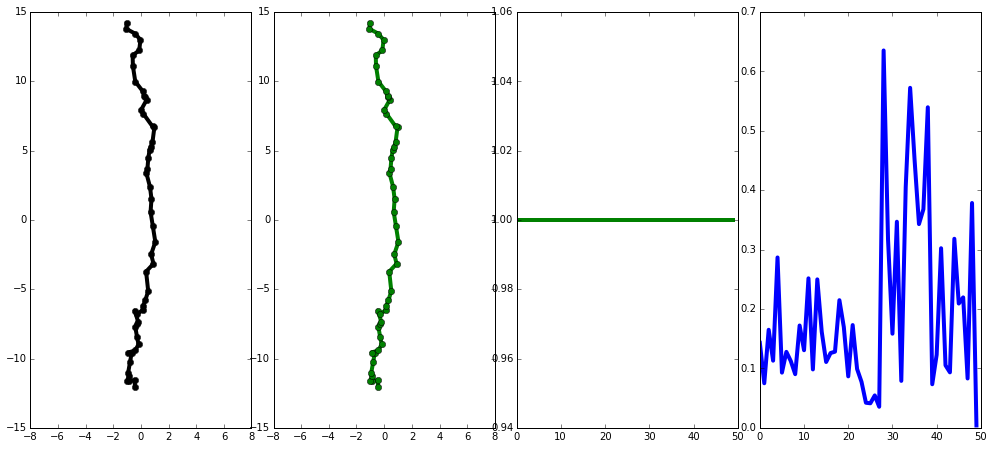

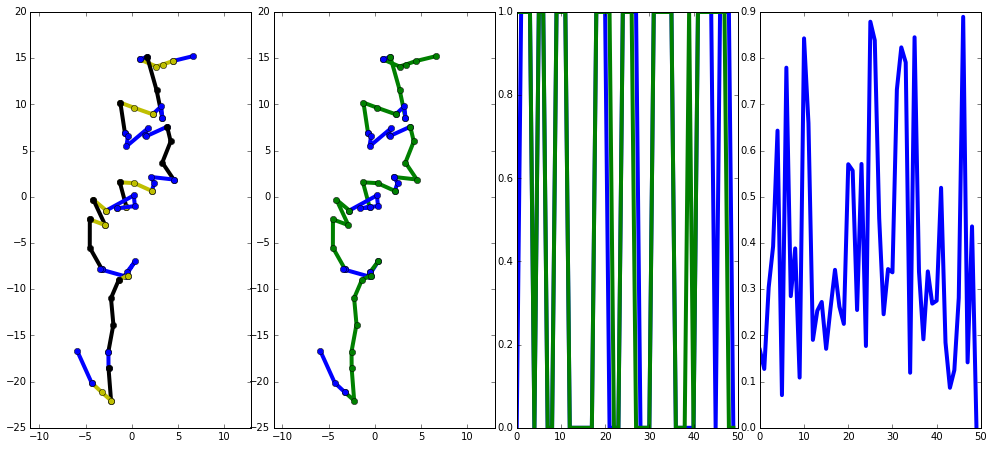

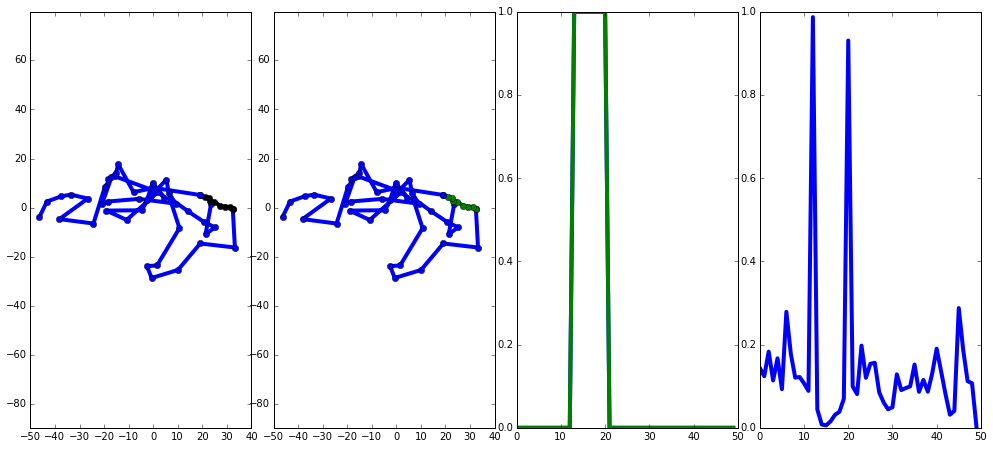

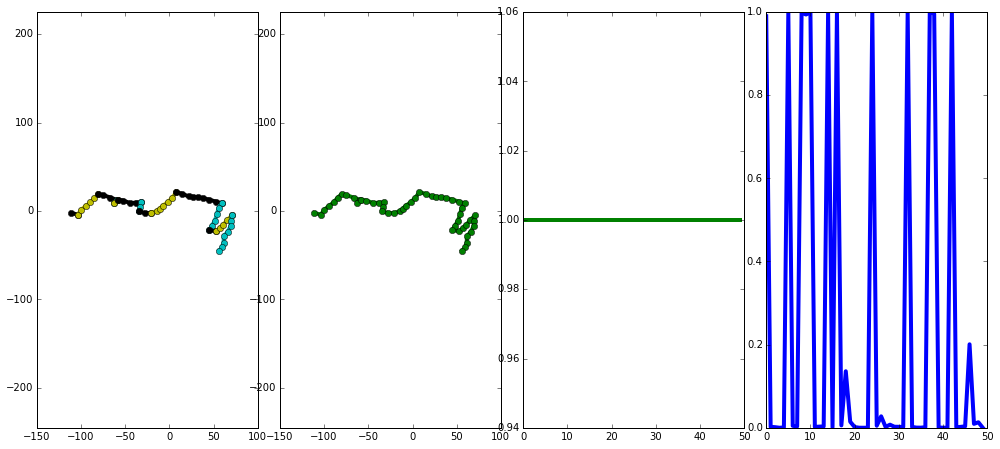

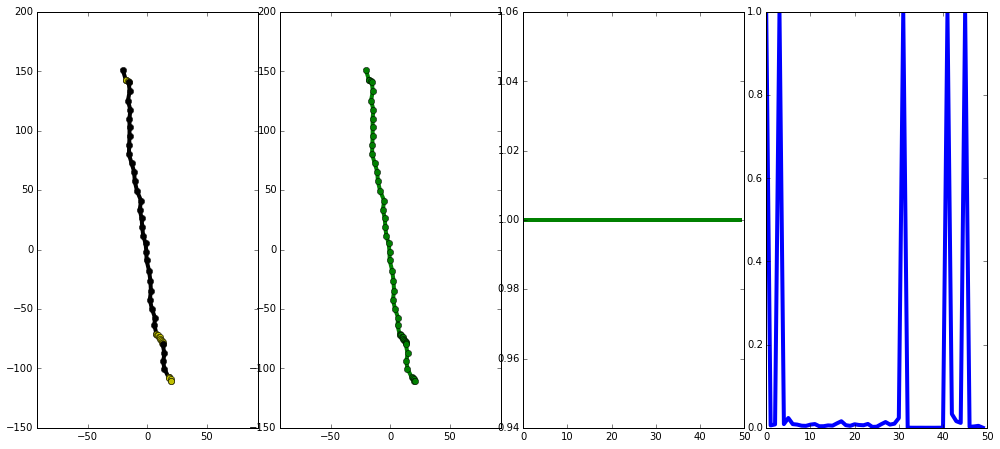

In [102]:
from Tools import plot_label,Labels,M0
#print score.shape
#import matplotlib as plt
l = 200
for i in range(1,11,1):
    
    init = np.argmax(convert_output(np.array(Y_tests[:100]))[i],axis=-1)

    proba = pred_RNN[i] #/ np.sum(pred[i],axis=1)[::,newaxis]
    classi = np.argmax(proba,axis=-1)
    
    delta_RNN = np.sum(classi_RNN != init[:l]) 


    perm = np.array([[0, 1, 2, 3, 4, 5, 6],
                 [0, 1, 2, 4, 5, 3, 6],
                 [0, 1, 2, 5, 4, 3, 6],
                 [0, 1, 2, 3, 5, 4, 6],
                 [0, 1, 2, 4, 3, 5, 6],
                 [0, 1, 2, 5, 3, 4, 6]],dtype=np.int)
    deltas = []
 
   
    #if gt == pcat:
    #   continue
    
    #if gt not in [4,7,8]:
    #    continue
    #classi=proba
    #print np.sum(classi != init) 
    #if np.sum(classi[:l] != init[:l]) < 100:
    #    continue
    fig = figure(figsize=(15,7))
    ax = fig.add_subplot(141)
    #plot(np.cumsum(X_test[i]))
    #ax = fig.add_subplot(121)
    
   
    random_sin=np.random.randint(0,2,l)
    
    #plot_traj(X_test[i][:l],init[:l],random_sin=random_sin)
    plot_label(X_traj_test[i][1][:l],np.argmax(Y_tests[i],axis=-1)[:l])
    #plot(X_traj_test[i][2][:l,0],X_traj_test[i][2][:l,1])
    plt.axis('equal')
    
    ax = fig.add_subplot(142)
    plot_label(X_traj_test[i][1][:l],classi[:l])
    plt.axis('equal')
    
    ax = fig.add_subplot(143)
    plot( init[:l])
   
    plot(classi[:l],label="%i N missed %i,"%(i,np.sum(classi[:l] != init[:l])))
    
    
    ax = fig.add_subplot(144)
    plot( pred_RNN_cat[i][:l])
   
    #plot(classi[:l],label="%i N missed %i,"%(i,np.sum(classi[:l] != init[:l])))
    legend()
 
    
   

In [103]:
from pynote.Median import load_traj
root = "/home/jarbona/cluster/test-onep-freebis/" +\
"coarse_3750_khun_0p00_Vribo_0p14_cuttoff_1p15_etelo_4p00_ctelo_2p00_compaction_50_microtubule_0p30/"
S=2
r2,lic2,axe2 =  load_traj(root,S,what=range(1,1),n=1,axe=False)


/home/jarbona/cluster/test-onep-freebis/coarse_3750_khun_0p00_Vribo_0p14_cuttoff_1p15_etelo_4p00_ctelo_2p00_compaction_50_microtubule_0p30//traj1/ch12 New or empty
opening


['HRMSDmidInt', 'MSDmidInt', 'MSDmidMid', 'MSDcentro', 'MSDmid', 'MSDcentroInt', 'HRMSDcentroMid', 'HRMSDmidMid', 'MSDcentroMid', 'HRMSDcentro', 'HRMSDcentroInt', 'HRMSDmid']
(900,)


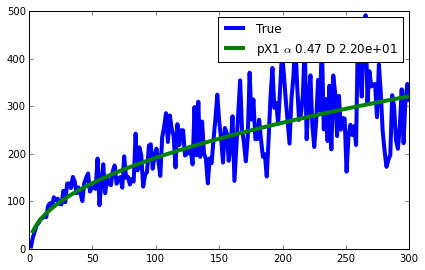

In [105]:
print [k for k in lic2[0] if "MSD" in k]
gene="mid"+"Mid"
s=1.5
print  lic2[0]["MSD"+gene].shape
a = lic2[0].plot("MSD"+gene,fit=True,end=200,legend="gene",divide=r2**2,shift= s,Break=100000,every=1,
                    toplot=True,label=True)
legend()

['MeanSqHRMSDmid', 'MeanSqMSDmidMid', 'MinHRMSDcentro', 'MaxMSDmidMid', 'HRMSDmidInt', 'MSDmidInt', 'MeanSqHRMSDmidMid', 'MSDmidMid', 'MinHRMSDmid', 'MinHRMSDcentroMid', 'MeanHRMSDmid', 'MeanHRMSDcentroMid', 'MinHRMSDmidMid', 'MeanMSDmid', 'MeanSqHRMSDcentroMid', 'MaxHRMSDcentroMid', 'MeanSqMSDmid', 'MSDcentro', 'MaxMSDmid', 'MaxHRMSDcentro', 'MeanSqHRMSDcentro', 'MaxHRMSDmid', 'MSDmid', 'MinMSDmid', 'MeanHRMSDmidMid', 'MeanHRMSDcentro', 'MSDcentroInt', 'HRMSDcentroMid', 'MeanMSDmidMid', 'HRMSDmidMid', 'MaxHRMSDmidMid', 'MSDcentroMid', 'MinMSDmidMid', 'HRMSDcentro', 'HRMSDcentroInt', 'HRMSDmid']


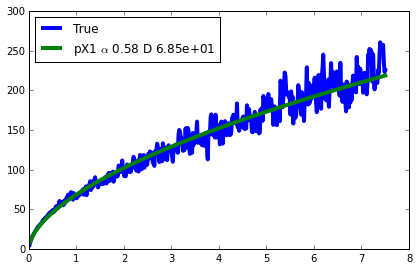

In [128]:
print [k for k in lic2[0] if "MSD" in k]
gene="centro"
s=1.5
#print  lic2[0]["MSD"+gene].shape
#a = lic2[0].plot("MeanHRMSD"+gene,fit=True,end=200,legend="gene",divide=r2**2,shift= s,Break=100000,every=1,
#                    toplot=True,label=True)
a = lic2[0].plot("MeanHRMSD"+gene+"Mid",fit=True,end=500,legend="gene",divide=r2**2,shift= s/100,Break=100000,every=1,
                    toplot=True,label=True)
legend(loc="best")
#xscale("log")
#yscale("log")